## **Problem Statement**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:**



1.  Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
2.  Also, determine the optimal value of lambda for ridge and lasso regression.

In [139]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

##Data understanding 

---



In [140]:
# Load data from csv
data = pd.read_csv("train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [141]:
#Check data columns 
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [142]:
#get shape of dataframe
data.shape

(1460, 81)

In [143]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [145]:
#cheked any null column exist or not
data.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [146]:
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

These features has most missing values so dropping these coloumns

PoolQC: Pool quality
       
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	  Good Wood
       MnWw	  Minimum Wood/Wire
       NA	    No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	  None

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [147]:
data = data.drop(columns=['PoolQC','Fence', 'MiscFeature','Alley','FireplaceQu'])

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [149]:
data.isnull().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
dtype: int64

In [150]:
#check unique values of LotFrontage
house_data = data.LotFrontage.value_counts()
house_data

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [151]:
#check median of LotFrontage
LotFrontage_median = data.LotFrontage.median()
LotFrontage_median

69.0

In [152]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
data.LotFrontage = data.LotFrontage.fillna(LotFrontage_median)
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
data.MasVnrArea = data.MasVnrArea.fillna(data.MasVnrArea.median())    
#replace Nan values of MasVnrArea with None i.e. No Masonary type
data.MasVnrType = data.MasVnrType.fillna('None')
#replace Nan values of BsmtQual with NA i.e. No Basement
data.BsmtQual = data.BsmtQual.fillna('NA')
#replace Nan values of BsmtCond with NA i.e. No Basement
data.BsmtCond = data.BsmtCond.fillna('NA')
#replace Nan values of BsmtExposure with No i.e. No Exposure
data.BsmtExposure = data.BsmtExposure.fillna('No')
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
data.BsmtFinType1 = data.BsmtFinType1.fillna('NA')

In [153]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
data.BsmtFinType2 = data.BsmtFinType2.fillna('NA')
#impute missing values of Electrical with mode due to categorical column
data.Electrical = data.Electrical.fillna(data.Electrical.mode()[0])    
#replace Nan values of GarageType with NA i.e. No Garage
data.GarageType = data.GarageType.fillna('NA')
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
data.GarageYrBlt = data.GarageYrBlt.fillna(0)
#replace Nan values of GarageFinish with NA i.e. No Garage
data.GarageFinish = data.GarageFinish.fillna('NA')
#replace Nan values of GarageQual with NA i.e. No Garage
data.GarageQual = data.GarageQual.fillna('NA')
#replace Nan values of GarageFinish with NA i.e. No Garage
data.GarageQual = data.GarageQual.fillna('NA')
#replace Nan values of GarageCond with NA i.e. No Garage
data.GarageCond = data.GarageCond.fillna('NA')
#check missing values again
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [154]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
data['HouseAge'] = data.YrSold - data.YearBuilt
#Drop YrSold, YearBuilt after HouseAge
data=data.drop(columns=['YrSold', 'YearBuilt'])
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
data = data.astype(convert_dict)
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
data = data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
data = data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
data = data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
data = data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
data = data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
data = data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
data = data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [155]:
data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [157]:
for c in data.columns:
    if data[c].dtype == np.object :
        print(c)
        print(data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [158]:
#Drop columns which have moe than 80% bias data
data=data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [160]:
#Get all object type columns
object_columns = []
for c in data.columns:
    if data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [161]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(data['MSSubClass'],drop_first=True, prefix='MSSubClass')


In [162]:
#concat MSSubClass_df with main house_data df
data = pd.concat([data,MSSubClass_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None         0.0          3     BrkTil         3             1             5         216           0        540          756          4       961       756             0       1717             1             0         1         0             3             1            4             7           1     Detchd       1998.0          Unf           3         642           0           35            272          0            0         0     

In [163]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0            0            0            1            0
1            0            0            1            0
2            0            0            1            0
3            0            0            1            0
4            0            0            1            0

In [164]:
#concat MSZoning_df with main house_data df
data = pd.concat([data,MSZoning_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None         0.0          3     BrkTil         3             1             5         216           0        540          756          4       961       756             0       1717             1             0         1         

In [165]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(data['LotShape'],drop_first=True, prefix='LotShape')

In [166]:
#concat LotShape_df with main house_data df
data = pd.concat([data,LotShape_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0
3         70       RL         60.0     9550      IR1    Corner      Crawfor     2Story            7            5          1970     Gable     Wd Sdng     Wd Shng       None         0.0          3     BrkTil         3           

In [167]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(data['LotConfig'],drop_first=True, prefix='LotConfig')

In [168]:
#concat LotConfig_df with main house_data df
data = pd.concat([data,LotConfig_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [169]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
data = pd.concat([data,Neighborhood_df],axis=1)
data.head()



MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [170]:
data.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       ...
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'], dtype='object', length=103)

In [171]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
data = pd.concat([data,HouseStyle_df],axis=1)
data.head()


MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [172]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
data = pd.concat([data,RoofStyle_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [173]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
data = pd.concat([data,Exterior1st_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [174]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
data = pd.concat([data,Exterior2nd_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [175]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
data = pd.concat([data,MasVnrType_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [176]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
data = pd.concat([data,Foundation_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [177]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
data = pd.concat([data,GarageType_df],axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [178]:
data.shape

(1460, 158)

In [179]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood HouseStyle  OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr     2Story            7            5          2003     Gable     VinylSd     VinylSd    BrkFace       196.0          4      PConc         4             1             6         706           0        150          856          5       856       854             0       1710             1             0         2         1             3             1            4             8           0     Attchd       2003.0          RFn           2         548           0           61              0          0            0         0        0       2     208500         5              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0   
1         20       RL         80.0     9600      Reg       FR2      Veenker     1Story            6            8          1976     Gable     MetalSd     MetalSd       None         0.0          3     CBlock         4             4             5         978           0        284         1262          5      1262         0             0       1262             0             1         2         0             3             1            3             6           1     Attchd       1976.0          RFn           2         460         298            0              0          0            0         0        0       5     181500        31              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0   
2         60       RL         68.0    11250      IR1    Inside      CollgCr     2Story            7            5          2002     Gable     VinylSd     VinylSd    BrkFace       162.0          4      PConc         4             2             6         486           0        434          920          5       920       866             0       1786             1             0         2         1             3             1            4             6           1     Attchd       2001.0          RFn           2         608           0           42              0          0            0         0        0       9     223500         7              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0   
3         70      

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 158 entries, MSSubClass to GarageType_NA
dtypes: float64(3), int64(38), object(13), uint8(104)
memory usage: 764.3+ KB


In [181]:
#Drop categorical variables after ceating dummy varaibles
data=data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

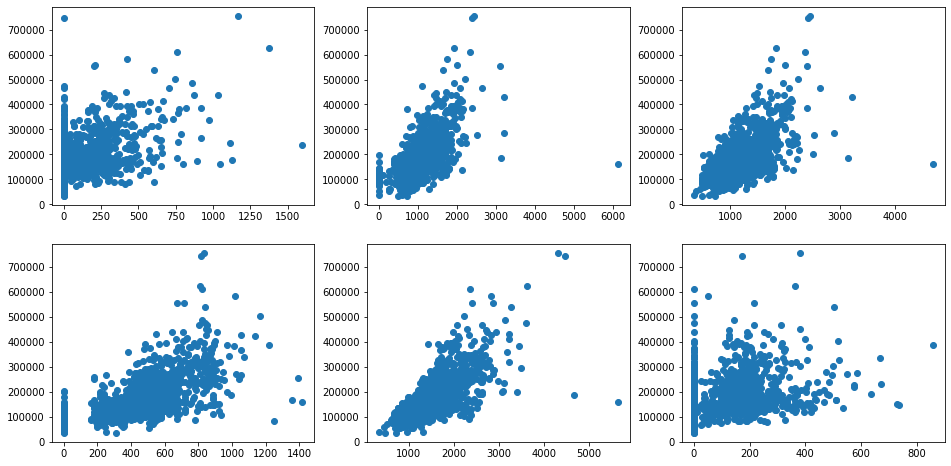

In [182]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(data.MasVnrArea,data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(data.TotalBsmtSF,data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(data['1stFlrSF'],data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(data['GarageArea'],data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(data['GrLivArea'],data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(data['WoodDeckSF'],data.SalePrice)

## Plotting heatmap to check the corelation between varables

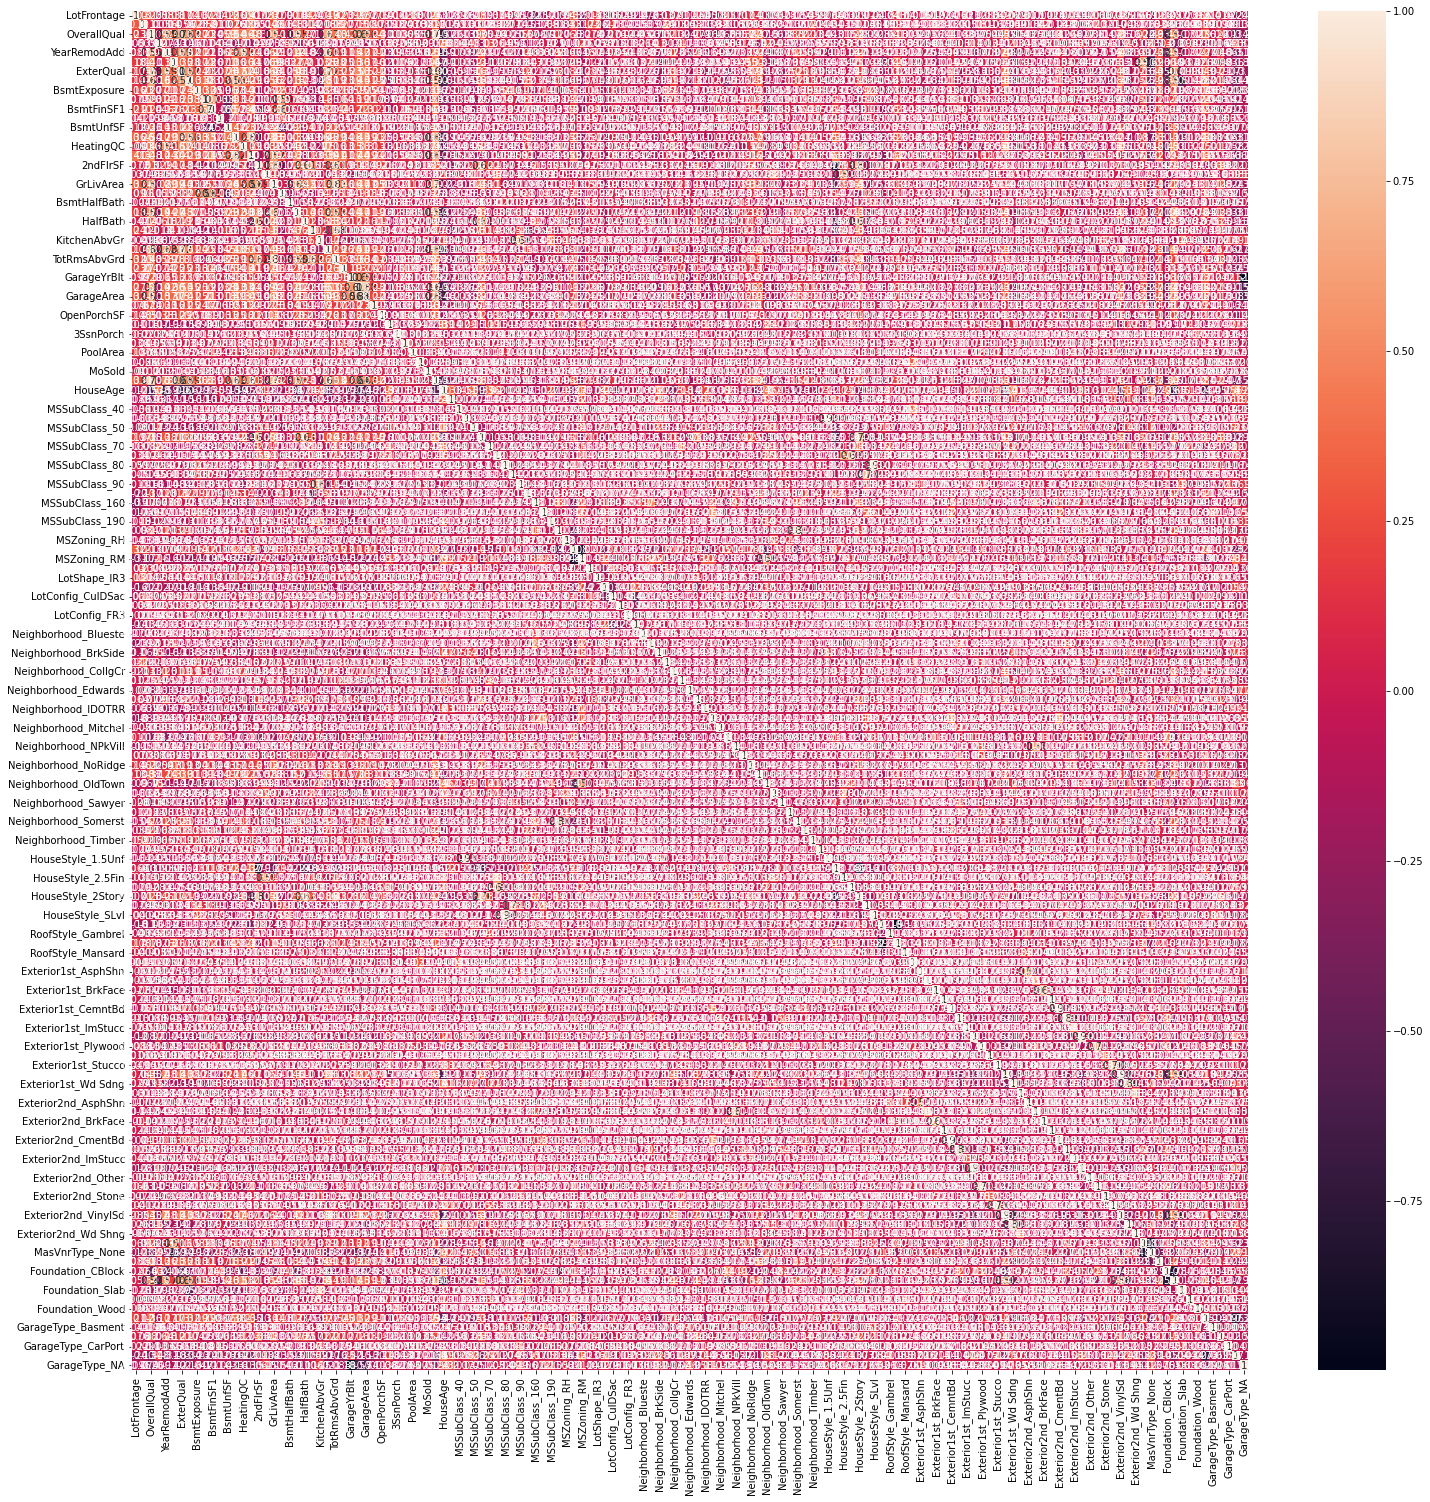

In [183]:
plt.figure(figsize=(25,25))
sns.heatmap(data[list(data.dtypes[data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

##Let us check the distribution of our target variable before scaling and Splitting
 

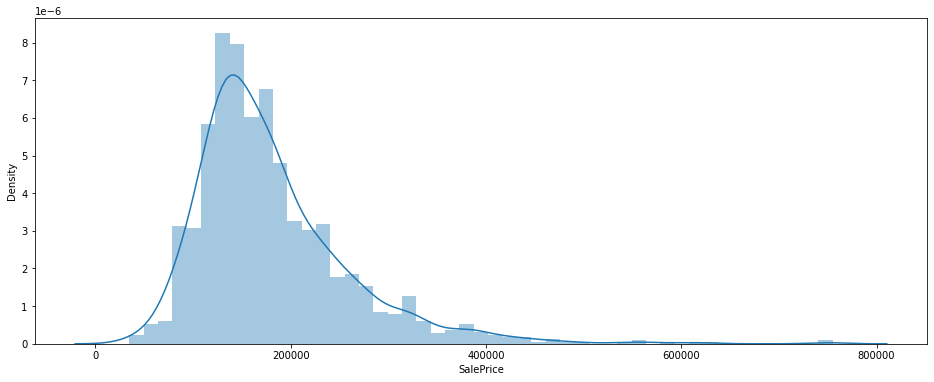

In [184]:
plt.figure(figsize=(16,6))
sns.distplot(data.SalePrice)
plt.show()

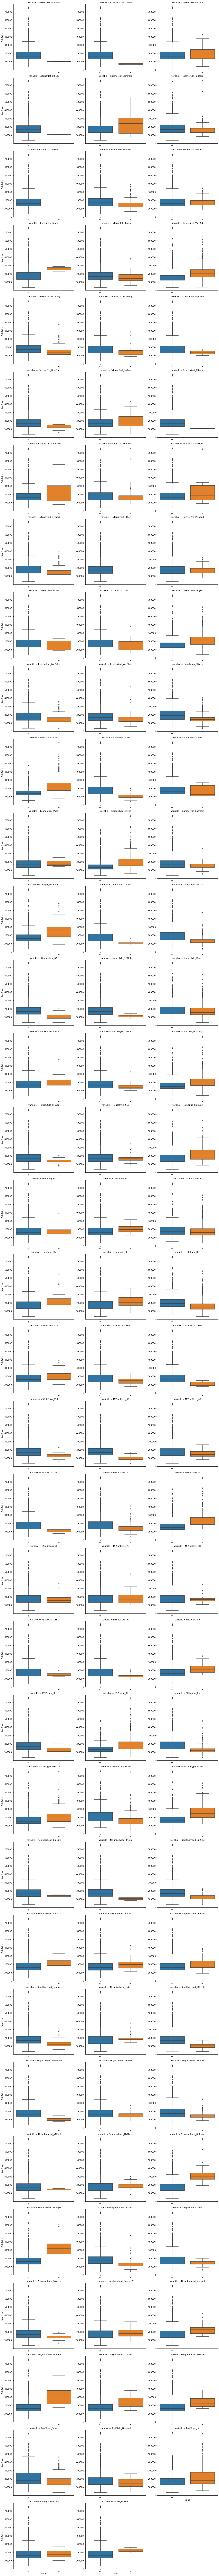

In [185]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = data.select_dtypes(exclude=['int64','float64'])
f = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(data[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

### Prepairing Data For Modeling

In [186]:
df_train,df_test = train_test_split(data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 145)
(439, 145)


In [187]:
df_train.describe()

LotFrontage        LotArea  OverallQual  OverallCond  YearRemodAdd   MasVnrArea    ExterQual     BsmtQual  BsmtExposure  BsmtFinType1   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF    HeatingQC     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold      SalePrice     HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
count  1021.000000    1021.000000  1021.000000  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   1021.000000   1021.000000  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000    1021.000000  1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000     1021.000000     1021.000000     1021.000000     1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000        1021.000000    1021.000000    1021.000000       1021.000000           1021.000000          1021.000000           1021.000000   
mean     69.569050   10489.964740     6.093046     5.580803   1984.984329   104.489716     3.399608     3.479922      1.691479      3.593536   448.165524    50.087169   563.745348  1061.998041     4.150833  1168.611166   343.540646      5.999021  1518.150833      0.439765      0.059745     1.567091     0.377081      2.856024      1.053869     3.511263      6.504407     0.598433  1868.316357     1.771792   471.995103    92.641528    47.035260      23.241920     3.940255    14.047013     2.149853     48.711068     6.288932  180609.596474    36.497551       0.041136       0.002938       0.010774       0.100881       0.196866       0.041136       0.009794       0.042116       0.014691       0.041136        0.064643        0.045054        0.005877        0.024486     0.044074     0.012733     0.785504     0.150833      0.030362      0.008815      0.633692           0.064643       0.030362       0.002938          0.710088              0.000979             0.011753              0.038198   
std      22.090553   10308.062725     1.399636     1.092121     20.604962   187.341089     0.571342     0.900348      1.058956      2.114914   465.115135   170.847470   448.739203   459.098042     0.974565   397.896911   435.498994     48.207914   531.849898      0.525381      0.241230     0.551872     0.500807      0.819993      0.230169     0.659114      1.605514     0.645769   455.160037     0.746119   212.213075   124.479090    66.195468      63.167621    32.333667    51.081766    34.524133    578.364428     2.748576   79099.444132    30.346064       0.198702       0.054153       0.103287       0.301319       0.397825       0.198702       0.098529       0.200951       0.120374       0.198702        0.246014        0.207524        0.076471        0.154627     0.205361     0.112173     0.410673     0.358061      0.171666      0.093519      0.482031           0.246014       0.171666       0.054153          0.453944              0.031296             0.107826              0.191768   
min      21.000

### Rescalling The Numeric Factors

In [188]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
318      0.925326 -0.057261     0.648310    -0.532073      0.389207    0.809137   1.051361  0.577925      2.181065      1.138412    1.159065   -0.293313  -0.454262     0.621091   0.871757  0.511410  2.137583     -0.124502   2.121655      1.066863     -0.247791  0.784821  1.244440      1.395790     -0.234155     0.741868      1.555150    0.622148     0.274068    1.646935    0.867501    1.988123     0.195951       1.912645  -0.121922    -0.275126 -0.062302 -0.084263 -0.833178     260000 -0.675791              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
239     -0.795709 -0.169753    -0.066511    -1.448170     -1.698692   -0.558025  -0.699764 -0.533302     -0.653302     -0.753845   -0.761831   -0.293313   0.172244    -0.712611  -1.181447 -0.931882  0.793638     -0.124502  -0.058599     -0.837450     -0.247791 -1.028080  1.244440      0.175669     -0.234155    -0.776063      0.308833    0.622148     0.177351   -1.034916   -1.188045   -0.744598     1.405086      -0.368121  -0.121922    -0.275126 -0.062302 -0.084263 -0.833178     113000  0.939707              0              0              0              1              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
986     -0.478677 -0.502762    -0.066511     2.216221      0.874765   -0.558025  -0.699764 -0.533302     -0.653302     -1.226909   -0.964030   -0.293313  -0.175567    -1.257424  -0.154845 -0.421449  0.667284     -0.124502   0.219811     -0.837450     -0.247791 -1.028080 -0.753316     -1.044452     -0.234155     0.741868     -0.937484   -0.927153     0.179549   -1.034916   -1.023035    2.422143    -0.710899      -0.368121  -0.121922    -0.275126 -0.062302 -0.084263 -0.105172     117000  1.961757              0              0              0              1              0              0              0              0              0              0               0               0               0               0            0            0            0            1             0             0             1                  0              0              0                 0                     0                    0                     0                     0                     0   
1416    -0.433386  0.082504    -1.496155     0.384025     

In [189]:
df_train.describe()

LotFrontage       LotArea   OverallQual   OverallCond  YearRemodAdd    MasVnrArea     ExterQual      BsmtQual  BsmtExposure  BsmtFinType1    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF     HeatingQC     1stFlrSF      2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd    Fireplaces   GarageYrBlt    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF  EnclosedPorch     3SsnPorch   ScreenPorch     PoolArea       MiscVal        MoSold      SalePrice      HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1021.000000  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   1.021000e+03  1.021000e+03  1.021000e+03  1021.000000  1.021000e+03  1.021000e+03    1021.000000  1.021000e+03    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000    1021.000000     1021.000000     1021.000000     1021.000000     1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   1021.000000   1021.000000        1021.000000    1021.000000    1021.000000       1021.000000           1021.000000          1021.000000   
mean  -1.043892e-17 -7.655211e-17 -2.696722e-16  1.539741e-16 -8.420732e-16 -6.611318e-17  1.243972e-16  1.287467e-16  6.263354e-17  8.612112e-17 -6.437336e-17 -1.870307e-17 -1.304865e-17  1.879006e-16 -3.270863e-16     0.000000 -6.350345e-17 -1.130883e-17 -5.915390e-17  4.871498e-17 -5.219462e-18  6.611318e-17  4.784507e-17 -3.479641e-18  3.862402e-16  3.070783e-16 -2.392253e-16  9.395031e-17  2.296563e-16  7.481229e-17 -9.569013e-17 -4.523534e-17 -7.133264e-17   5.306453e-17 -2.087785e-17 -3.479641e-18     0.000000 -1.391856e-17  5.567426e-17  180609.596474 -9.742995e-17       0.041136       0.002938       0.010774       0.100881       0.196866       0.041136       0.009794       0.042116       0.014691       0.041136        0.064643        0.045054        0.005877        0.024486     0.044074     0.012733     0.785504     0.150833      0.030362      0.008815      0.633692           0.064643       0.030362       0.002938          0.710088              0.000979             0.011753   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00     1.000490  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   1.000490e+00  1.000490e+00  1.000490e+00     1.000490  1.000490e+00  1.000490e+00   79099.444132  1.000490e+00       0.198702       0.054153       0.103287       0.301319       0.397825       0.198702       0.098529       0.200951       0.120374       0.198702        0.246014        0.207524        0.076471        0.154627     0.205361     0.112173     0.410673     0.358061      0.171666      0.093519      0.482031           0.246014       0.171666       0.054153          0.453944              0.031296             0.107826   
min 

### Training The Model

In [190]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [191]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA'], dtype='object', length=144)


### RFE- Recursive Feature Elimination

In [192]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [193]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 24),
 ('LotArea', False, 12),
 ('OverallQual', True, 1),
 ('OverallCond', False, 20),
 ('YearRemodAdd', False, 59),
 ('MasVnrArea', False, 22),
 ('ExterQual', False, 8),
 ('BsmtQual', False, 43),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 15),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 61),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 21),
 ('BsmtHalfBath', False, 70),
 ('FullBath', False, 36),
 ('HalfBath', False, 33),
 ('BedroomAbvGr', False, 51),
 ('KitchenAbvGr', False, 23),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 50),
 ('Fireplaces', False, 30),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 26),
 ('WoodDeckSF', False, 49),
 ('OpenPorchSF', False, 62),
 ('EnclosedPorch', False, 73),
 ('3SsnPorch', False, 44),
 ('ScreenPorch', False, 48),
 ('PoolA

In [194]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'GarageYrBlt', 'GarageCars', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_

In [195]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkFace', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exter

## Building model using statsmodel, for the detailed statistics

In [196]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     84.16
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:06   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     953   BIC:                         2.442e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.235e+05   1.33e+04      9.306      0.000    9.74e+04     1.5e+05
OverallQual           1.879e+04   1891.753      9.935      0.000    1.51e+04    2.25e+04
BsmtExposure          1.078e+04   1244.516      8.663      0.000    8338.752    1.32e+04
BsmtFinSF1            4743.6004    918.804      5.163      0.000    2940.487    6546.713
BsmtFinSF2             245.1128   1014.423      0.242      0.809   -1745.647    2235.873
BsmtUnfSF            -2666.9262    907.503     -2.939      0.003   -4447.861    -885.992
TotalBsmtSF           2290.2362   1344.103      1.704      0.089    -347.507    4927.980
1stFlrSF              4857.3454   1786.789      2.718      0.007    1350.850    8363.841
2ndFlrSF              1.836e+04   1959.154      9.372      0.000    1.45e+04    2.22e+04
LowQualFinSF          -822.1513   1157.169     -0.710      0.478   -3093.045    1448.742
GrLivArea              1.86e+04   1177.554     15.791      0.000    1.63e+04    2.09e+04
KitchenQual           8373.2620   1471.615      5.690      0.000    5485.281    1.13e+04
GarageYrBlt          -5861.3921   1646.174     -3.561      0.000   -9091.937   -2630.847
GarageCars            1.073e+04   1708.303      6.282      0.000    7378.739    1.41e+04
MSSubClass_45        -2.773e+04   2.45e+04     -1.133      0.258   -7.58e+04    2.03e+04
MSSubClass_90         -2.55e+04   5702.634     -4.471      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.632e+04   4895.871     -5.375      0.000   -3.59e+04   -1.67e+04
MSSubClass_160       -2.841e+04   7714.940     -3.683      0.000   -4.36e+04   -1.33e+04
MSSubClass_180       -2.076e+04   1.83e+04     -1.133      0.258   -5.67e+04    1.52e+04
MSSubClass_190       -1.443e+04   6915.729     -2.086      0.037    -2.8e+04    -856.457
MSZoning_FV           2.844e+04    1.6e+04      1.778      0.076   -2951.670    5.98e+04
MSZoning_RH            3.24e+04   1.51e+04      2.145      0.032    2762.085     6.2e+04
MSZoning_RL           3.174e+04   1.24e+04      2.565      0.010    7455.354     5.6e+04
MSZoning_RM           2.885e+04   1.26e+04      2.282      0.023    4040.384    5.37e+04
LotShape_IR3         -3.003e+04   1.11e+04     -2.711      0.007   -5.18e+04   -8292.761
LotConfig_CulDSac     1.171e+04   4202.007      2.787      0.005    3466.015       2e+04
LotConfig_FR2        -9870.8821   5924.605     -1.666      0.096   -2.15e+04    1755.897
LotConfig_FR3         -1.38e+04   1.84e+04     -0.752      0.452   -4.98e+04    2.22e+04
Neighborhood_Blueste  2.456e+04   3.25e+04      0.755      0.450   -3.93e+04    8.84e+04
Neighborhood_BrDale   1.774e+04   1.23e+04      1.437      0.151   -6494.102     4.2e+04
Neighborhood_ClearCr  1.444e+04   7612.026      1.897      0.058    -497.885    2.94e+04
Neighborhood_Crawfor  3.422e+04   6073.654      5.634    

In [197]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
59    Exterior2nd_CBlock     inf
56   Exterior2nd_AsphShn     inf
48   Exterior1st_AsphShn     inf
3             BsmtFinSF1     inf
4             BsmtFinSF2     inf
5              BsmtUnfSF     inf
6            TotalBsmtSF     inf
7               1stFlrSF     inf
8               2ndFlrSF     inf
9           LowQualFinSF     inf
10             GrLivArea     inf
50    Exterior1st_CBlock     inf
0                  const  185.68
22           MSZoning_RL   27.20
23           MSZoning_RM   21.59
60   Exterior2nd_CmentBd   19.44
51   Exterior1st_CemntBd   19.04
20           MSZoning_FV   11.37
42     HouseStyle_1.5Unf    6.82
14         MSSubClass_45    6.74
68   Exterior2nd_Wd Sdng    5.62
55   Exterior1st_Wd Sdng    5.40
39  Neighborhood_Somerst    4.77
46     HouseStyle_2Story    4.51
72     GarageType_Detchd    4.49
70       MasVnrType_None    4.33
71     GarageType_Attchd    4.24
43     HouseStyle_1Story    4.03
57   Exterior2nd_Brk Cmn    3.85
1            OverallQual    3.77
69    MasVnrType_BrkFace    3.63
64   Exterior2nd_Plywood    3.15
13            GarageCars    3.08
21           MSZoning_RH    3.02
12           GarageYrBlt    2.86
53   Exterior1st_Plywood    2.86
17        MSSubClass_160    2.70
34  Neighborhood_MeadowV    2.62
49   Exterior1st_BrkComm    2.58
67   Exterior2nd_VinylSd    2.55
35  Neighborhood_NPkVill    2.28
11           KitchenQual    2.28
18        MSSubClass_180    2.07
38  Neighborhood_OldTown    1.89
29   Neighborhood_BrDale    1.87
61   Exterior2nd_HdBoard    1.81
37  Neighborhood_NridgHt    1.67
2           BsmtExposure    1.63
16        MSSubClass_120    1.53
44     HouseStyle_2.5Fin    1.45
36  Neighborhood_NoRidge    1.41
15         MSSubClass_90    1.35
62   Exterior2nd_ImStucc    1.33
33  Neighborhood_Gilbert    1.33
54     Exterior1st_Stone    1.30
65     Exterior2nd_Stone    1.30
32  Neighborhood_Edwards    1.29
40  Neighborhood_StoneBr    1.25
45     HouseStyle_2.5Unf    1.22
58   Exterior2nd_BrkFace    1.22
52   Exterior1st_ImStucc    1.21
66    Exterior2nd_Stucco    1.21
19        MSSubClass_190    1.20
31  Neighborhood_Crawfor    1.18
41  Neighborhood_Veenker    1.18
30  Neighborhood_ClearCr    1.17
24          LotShape_IR3    1.13
25     LotConfig_CulDSac    1.13
28  Neighborhood_Blueste    1.09
26         LotConfig_FR2    1.09
47     RoofStyle_Gambrel    1.08
27         LotConfig_FR3    1.04
63     Exterior2nd_Other     NaN

___GarageType_NA has higher p-value. Lets drop it.___

In [198]:
X_train_new = X_train_rfe

In [199]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'GarageYrBlt', 'GarageCars', 'MSSubClass_45', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Ext

## ___Rebuild the model without GarageType_NA___

In [200]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     84.16
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:07   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     953   BIC:                         2.442e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.235e+05   1.33e+04      9.306      0.000    9.74e+04     1.5e+05
OverallQual           1.879e+04   1891.753      9.935      0.000    1.51e+04    2.25e+04
BsmtExposure          1.078e+04   1244.516      8.663      0.000    8338.752    1.32e+04
BsmtFinSF1            4743.6004    918.804      5.163      0.000    2940.487    6546.713
BsmtFinSF2             245.1128   1014.423      0.242      0.809   -1745.647    2235.873
BsmtUnfSF            -2666.9262    907.503     -2.939      0.003   -4447.861    -885.992
TotalBsmtSF           2290.2362   1344.103      1.704      0.089    -347.507    4927.980
1stFlrSF              4857.3454   1786.789      2.718      0.007    1350.850    8363.841
2ndFlrSF              1.836e+04   1959.154      9.372      0.000    1.45e+04    2.22e+04
LowQualFinSF          -822.1513   1157.169     -0.710      0.478   -3093.045    1448.742
GrLivArea              1.86e+04   1177.554     15.791      0.000    1.63e+04    2.09e+04
KitchenQual           8373.2620   1471.615      5.690      0.000    5485.281    1.13e+04
GarageYrBlt          -5861.3921   1646.174     -3.561      0.000   -9091.937   -2630.847
GarageCars            1.073e+04   1708.303      6.282      0.000    7378.739    1.41e+04
MSSubClass_45        -2.773e+04   2.45e+04     -1.133      0.258   -7.58e+04    2.03e+04
MSSubClass_90         -2.55e+04   5702.634     -4.471      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.632e+04   4895.871     -5.375      0.000   -3.59e+04   -1.67e+04
MSSubClass_160       -2.841e+04   7714.940     -3.683      0.000   -4.36e+04   -1.33e+04
MSSubClass_180       -2.076e+04   1.83e+04     -1.133      0.258   -5.67e+04    1.52e+04
MSSubClass_190       -1.443e+04   6915.729     -2.086      0.037    -2.8e+04    -856.457
MSZoning_FV           2.844e+04    1.6e+04      1.778      0.076   -2951.670    5.98e+04
MSZoning_RH            3.24e+04   1.51e+04      2.145      0.032    2762.085     6.2e+04
MSZoning_RL           3.174e+04   1.24e+04      2.565      0.010    7455.354     5.6e+04
MSZoning_RM           2.885e+04   1.26e+04      2.282      0.023    4040.384    5.37e+04
LotShape_IR3         -3.003e+04   1.11e+04     -2.711      0.007   -5.18e+04   -8292.761
LotConfig_CulDSac     1.171e+04   4202.007      2.787      0.005    3466.015       2e+04
LotConfig_FR2        -9870.8821   5924.605     -1.666      0.096   -2.15e+04    1755.897
LotConfig_FR3         -1.38e+04   1.84e+04     -0.752      0.452   -4.98e+04    2.22e+04
Neighborhood_Blueste  2.456e+04   3.25e+04      0.755      0.450   -3.93e+04    8.84e+04
Neighborhood_BrDale   1.774e+04   1.23e+04      1.437      0.151   -6494.102     4.2e+04
Neighborhood_ClearCr  1.444e+04   7612.026      1.897      0.058    -497.885    2.94e+04
Neighborhood_Crawfor  3.422e+04   6073.654      5.634    

In [201]:
#___Exterior1st_CBlock has higher p-value. Lets drop it.___

X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

___Rebuild the model without Exterior1st_CBlock___

In [202]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     84.16
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:07   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     953   BIC:                         2.442e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.235e+05   1.33e+04      9.306      0.000    9.74e+04     1.5e+05
OverallQual           1.879e+04   1891.753      9.935      0.000    1.51e+04    2.25e+04
BsmtExposure          1.078e+04   1244.516      8.663      0.000    8338.752    1.32e+04
BsmtFinSF1            4743.6004    918.804      5.163      0.000    2940.487    6546.713
BsmtFinSF2             245.1128   1014.423      0.242      0.809   -1745.647    2235.873
BsmtUnfSF            -2666.9262    907.503     -2.939      0.003   -4447.861    -885.992
TotalBsmtSF           2290.2362   1344.103      1.704      0.089    -347.507    4927.980
1stFlrSF              4857.3454   1786.789      2.718      0.007    1350.850    8363.841
2ndFlrSF              1.836e+04   1959.154      9.372      0.000    1.45e+04    2.22e+04
LowQualFinSF          -822.1513   1157.169     -0.710      0.478   -3093.045    1448.742
GrLivArea              1.86e+04   1177.554     15.791      0.000    1.63e+04    2.09e+04
KitchenQual           8373.2620   1471.615      5.690      0.000    5485.281    1.13e+04
GarageYrBlt          -5861.3921   1646.174     -3.561      0.000   -9091.937   -2630.847
GarageCars            1.073e+04   1708.303      6.282      0.000    7378.739    1.41e+04
MSSubClass_45        -2.773e+04   2.45e+04     -1.133      0.258   -7.58e+04    2.03e+04
MSSubClass_90         -2.55e+04   5702.634     -4.471      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.632e+04   4895.871     -5.375      0.000   -3.59e+04   -1.67e+04
MSSubClass_160       -2.841e+04   7714.940     -3.683      0.000   -4.36e+04   -1.33e+04
MSSubClass_180       -2.076e+04   1.83e+04     -1.133      0.258   -5.67e+04    1.52e+04
MSSubClass_190       -1.443e+04   6915.729     -2.086      0.037    -2.8e+04    -856.457
MSZoning_FV           2.844e+04    1.6e+04      1.778      0.076   -2951.670    5.98e+04
MSZoning_RH            3.24e+04   1.51e+04      2.145      0.032    2762.085     6.2e+04
MSZoning_RL           3.174e+04   1.24e+04      2.565      0.010    7455.354     5.6e+04
MSZoning_RM           2.885e+04   1.26e+04      2.282      0.023    4040.384    5.37e+04
LotShape_IR3         -3.003e+04   1.11e+04     -2.711      0.007   -5.18e+04   -8292.761
LotConfig_CulDSac     1.171e+04   4202.007      2.787      0.005    3466.015       2e+04
LotConfig_FR2        -9870.8821   5924.605     -1.666      0.096   -2.15e+04    1755.897
LotConfig_FR3         -1.38e+04   1.84e+04     -0.752      0.452   -4.98e+04    2.22e+04
Neighborhood_Blueste  2.456e+04   3.25e+04      0.755      0.450   -3.93e+04    8.84e+04
Neighborhood_BrDale   1.774e+04   1.23e+04      1.437      0.151   -6494.102     4.2e+04
Neighborhood_ClearCr  1.444e+04   7612.026      1.897      0.058    -497.885    2.94e+04
Neighborhood_Crawfor  3.422e+04   6073.654      5.634    

___Exterior2nd_CBlock has higher p-value. Lets drop it.___

In [203]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     85.53
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:07   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     954   BIC:                         2.442e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.235e+05   1.33e+04      9.311      0.000    9.75e+04     1.5e+05
OverallQual           1.879e+04   1889.463      9.946      0.000    1.51e+04    2.25e+04
BsmtExposure          1.078e+04   1243.810      8.668      0.000    8340.383    1.32e+04
BsmtFinSF1            4744.1308    917.976      5.168      0.000    2942.645    6545.617
BsmtFinSF2             245.4324   1013.777      0.242      0.809   -1744.058    2234.923
BsmtUnfSF            -2666.6529    906.934     -2.940      0.003   -4446.469    -886.837
TotalBsmtSF           2291.1595   1342.681      1.706      0.088    -343.790    4926.109
1stFlrSF              4856.5210   1785.423      2.720      0.007    1352.712    8360.330
2ndFlrSF              1.836e+04   1956.819      9.384      0.000    1.45e+04    2.22e+04
LowQualFinSF          -822.2935   1156.543     -0.711      0.477   -3091.955    1447.369
GrLivArea              1.86e+04   1176.588     15.805      0.000    1.63e+04    2.09e+04
KitchenQual           8373.0450   1470.808      5.693      0.000    5486.652    1.13e+04
GarageYrBlt          -5861.1111   1645.257     -3.562      0.000   -9089.853   -2632.369
GarageCars            1.073e+04   1706.798      6.287      0.000    7380.737    1.41e+04
MSSubClass_45        -2.773e+04   2.45e+04     -1.133      0.257   -7.58e+04    2.03e+04
MSSubClass_90         -2.55e+04   5699.446     -4.474      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.631e+04   4890.964     -5.380      0.000   -3.59e+04   -1.67e+04
MSSubClass_160       -2.841e+04   7710.732     -3.685      0.000   -4.35e+04   -1.33e+04
MSSubClass_180       -2.076e+04   1.83e+04     -1.133      0.257   -5.67e+04    1.52e+04
MSSubClass_190       -1.443e+04   6907.864     -2.089      0.037    -2.8e+04    -877.001
MSZoning_FV           2.844e+04    1.6e+04      1.779      0.076   -2931.583    5.98e+04
MSZoning_RH           3.241e+04   1.51e+04      2.147      0.032    2782.085     6.2e+04
MSZoning_RL           3.174e+04   1.24e+04      2.567      0.010    7476.259     5.6e+04
MSZoning_RM           2.884e+04   1.26e+04      2.283      0.023    4052.561    5.36e+04
LotShape_IR3         -3.003e+04   1.11e+04     -2.713      0.007   -5.18e+04   -8305.739
LotConfig_CulDSac     1.171e+04   4199.800      2.789      0.005    3470.222       2e+04
LotConfig_FR2        -9870.0146   5921.357     -1.667      0.096   -2.15e+04    1750.375
LotConfig_FR3        -1.379e+04   1.83e+04     -0.752      0.452   -4.98e+04    2.22e+04
Neighborhood_Blueste  2.457e+04   3.25e+04      0.756      0.450   -3.92e+04    8.84e+04
Neighborhood_BrDale   1.775e+04   1.23e+04      1.439      0.151   -6463.376     4.2e+04
Neighborhood_ClearCr  1.444e+04   7607.713      1.898      0.058    -490.878    2.94e+04
Neighborhood_Crawfor  3.422e+04   6070.394      5.637    

___GrLivAreaFin has higher p-value. Lets drop it.___
 ___Rebuild the model without GrLivArea___

In [204]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)


X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     85.53
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:07   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     954   BIC:                         2.442e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.235e+05   1.33e+04      9.311      0.000    9.75e+04     1.5e+05
OverallQual           1.879e+04   1889.463      9.946      0.000    1.51e+04    2.25e+04
BsmtExposure          1.078e+04   1243.810      8.668      0.000    8340.383    1.32e+04
BsmtFinSF1            4744.1308    917.976      5.168      0.000    2942.645    6545.617
BsmtFinSF2             245.4324   1013.777      0.242      0.809   -1744.058    2234.923
BsmtUnfSF            -2666.6529    906.934     -2.940      0.003   -4446.469    -886.837
TotalBsmtSF           2291.1595   1342.681      1.706      0.088    -343.790    4926.109
1stFlrSF              1.877e+04   2130.117      8.811      0.000    1.46e+04    2.29e+04
2ndFlrSF              3.359e+04   2634.803     12.749      0.000    2.84e+04    3.88e+04
LowQualFinSF           863.2542   1165.338      0.741      0.459   -1423.667    3150.176
KitchenQual           8373.0450   1470.808      5.693      0.000    5486.652    1.13e+04
GarageYrBlt          -5861.1111   1645.257     -3.562      0.000   -9089.853   -2632.369
GarageCars            1.073e+04   1706.798      6.287      0.000    7380.737    1.41e+04
MSSubClass_45        -2.773e+04   2.45e+04     -1.133      0.257   -7.58e+04    2.03e+04
MSSubClass_90         -2.55e+04   5699.446     -4.474      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.631e+04   4890.964     -5.380      0.000   -3.59e+04   -1.67e+04
MSSubClass_160       -2.841e+04   7710.732     -3.685      0.000   -4.35e+04   -1.33e+04
MSSubClass_180       -2.076e+04   1.83e+04     -1.133      0.257   -5.67e+04    1.52e+04
MSSubClass_190       -1.443e+04   6907.864     -2.089      0.037    -2.8e+04    -877.001
MSZoning_FV           2.844e+04    1.6e+04      1.779      0.076   -2931.583    5.98e+04
MSZoning_RH           3.241e+04   1.51e+04      2.147      0.032    2782.085     6.2e+04
MSZoning_RL           3.174e+04   1.24e+04      2.567      0.010    7476.259     5.6e+04
MSZoning_RM           2.884e+04   1.26e+04      2.283      0.023    4052.561    5.36e+04
LotShape_IR3         -3.003e+04   1.11e+04     -2.713      0.007   -5.18e+04   -8305.739
LotConfig_CulDSac     1.171e+04   4199.800      2.789      0.005    3470.222       2e+04
LotConfig_FR2        -9870.0146   5921.357     -1.667      0.096   -2.15e+04    1750.375
LotConfig_FR3        -1.379e+04   1.83e+04     -0.752      0.452   -4.98e+04    2.22e+04
Neighborhood_Blueste  2.457e+04   3.25e+04      0.756      0.450   -3.92e+04    8.84e+04
Neighborhood_BrDale   1.775e+04   1.23e+04      1.439      0.151   -6463.376     4.2e+04
Neighborhood_ClearCr  1.444e+04   7607.713      1.898      0.058    -490.878    2.94e+04
Neighborhood_Crawfor  3.422e+04   6070.394      5.637      0.000    2.23e+04    4.61e+04
Neighborhood_Edwards -1.134e+04   4210.236     -2.694    

___Exterior1st_AsphShn has higher p-value. Lets drop it.___
___Rebuild the model without Exterior1st_AsphShn___

In [205]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     85.53
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:07   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     954   BIC:                         2.442e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.235e+05   1.33e+04      9.311      0.000    9.75e+04     1.5e+05
OverallQual           1.879e+04   1889.463      9.946      0.000    1.51e+04    2.25e+04
BsmtExposure          1.078e+04   1243.810      8.668      0.000    8340.383    1.32e+04
BsmtFinSF1            4744.1308    917.976      5.168      0.000    2942.645    6545.617
BsmtFinSF2             245.4324   1013.777      0.242      0.809   -1744.058    2234.923
BsmtUnfSF            -2666.6529    906.934     -2.940      0.003   -4446.469    -886.837
TotalBsmtSF           2291.1595   1342.681      1.706      0.088    -343.790    4926.109
1stFlrSF              1.877e+04   2130.117      8.811      0.000    1.46e+04    2.29e+04
2ndFlrSF              3.359e+04   2634.803     12.749      0.000    2.84e+04    3.88e+04
LowQualFinSF           863.2542   1165.338      0.741      0.459   -1423.667    3150.176
KitchenQual           8373.0450   1470.808      5.693      0.000    5486.652    1.13e+04
GarageYrBlt          -5861.1111   1645.257     -3.562      0.000   -9089.853   -2632.369
GarageCars            1.073e+04   1706.798      6.287      0.000    7380.737    1.41e+04
MSSubClass_45        -2.773e+04   2.45e+04     -1.133      0.257   -7.58e+04    2.03e+04
MSSubClass_90         -2.55e+04   5699.446     -4.474      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.631e+04   4890.964     -5.380      0.000   -3.59e+04   -1.67e+04
MSSubClass_160       -2.841e+04   7710.732     -3.685      0.000   -4.35e+04   -1.33e+04
MSSubClass_180       -2.076e+04   1.83e+04     -1.133      0.257   -5.67e+04    1.52e+04
MSSubClass_190       -1.443e+04   6907.864     -2.089      0.037    -2.8e+04    -877.001
MSZoning_FV           2.844e+04    1.6e+04      1.779      0.076   -2931.583    5.98e+04
MSZoning_RH           3.241e+04   1.51e+04      2.147      0.032    2782.085     6.2e+04
MSZoning_RL           3.174e+04   1.24e+04      2.567      0.010    7476.259     5.6e+04
MSZoning_RM           2.884e+04   1.26e+04      2.283      0.023    4052.561    5.36e+04
LotShape_IR3         -3.003e+04   1.11e+04     -2.713      0.007   -5.18e+04   -8305.739
LotConfig_CulDSac     1.171e+04   4199.800      2.789      0.005    3470.222       2e+04
LotConfig_FR2        -9870.0146   5921.357     -1.667      0.096   -2.15e+04    1750.375
LotConfig_FR3        -1.379e+04   1.83e+04     -0.752      0.452   -4.98e+04    2.22e+04
Neighborhood_Blueste  2.457e+04   3.25e+04      0.756      0.450   -3.92e+04    8.84e+04
Neighborhood_BrDale   1.775e+04   1.23e+04      1.439      0.151   -6463.376     4.2e+04
Neighborhood_ClearCr  1.444e+04   7607.713      1.898      0.058    -490.878    2.94e+04
Neighborhood_Crawfor  3.422e+04   6070.394      5.637      0.000    2.23e+04    4.61e+04
Neighborhood_Edwards -1.134e+04   4210.236     -2.694    

In [206]:
X_train_new.shape

(1021, 69)

In [207]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
5              BsmtUnfSF     inf
6            TotalBsmtSF     inf
3             BsmtFinSF1     inf
4             BsmtFinSF2     inf
0                  const  185.68
21           MSZoning_RL   27.19
22           MSZoning_RM   21.58
56   Exterior2nd_CmentBd   19.44
48   Exterior1st_CemntBd   19.04
19           MSZoning_FV   11.37
8               2ndFlrSF    7.33
41     HouseStyle_1.5Unf    6.82
13         MSSubClass_45    6.74
64   Exterior2nd_Wd Sdng    5.62
52   Exterior1st_Wd Sdng    5.40
7               1stFlrSF    4.79
38  Neighborhood_Somerst    4.77
45     HouseStyle_2Story    4.50
68     GarageType_Detchd    4.49
66       MasVnrType_None    4.33
67     GarageType_Attchd    4.24
42     HouseStyle_1Story    4.03
54   Exterior2nd_Brk Cmn    3.85
1            OverallQual    3.77
65    MasVnrType_BrkFace    3.63
60   Exterior2nd_Plywood    3.15
12            GarageCars    3.08
20           MSZoning_RH    3.02
11           GarageYrBlt    2.86
50   Exterior1st_Plywood    2.86
16        MSSubClass_160    2.70
33  Neighborhood_MeadowV    2.62
47   Exterior1st_BrkComm    2.58
63   Exterior2nd_VinylSd    2.55
10           KitchenQual    2.28
34  Neighborhood_NPkVill    2.28
17        MSSubClass_180    2.07
28   Neighborhood_BrDale    1.87
37  Neighborhood_OldTown    1.86
57   Exterior2nd_HdBoard    1.81
36  Neighborhood_NridgHt    1.67
2           BsmtExposure    1.63
15        MSSubClass_120    1.53
43     HouseStyle_2.5Fin    1.45
9           LowQualFinSF    1.43
35  Neighborhood_NoRidge    1.41
14         MSSubClass_90    1.35
58   Exterior2nd_ImStucc    1.33
32  Neighborhood_Gilbert    1.33
61     Exterior2nd_Stone    1.30
51     Exterior1st_Stone    1.30
31  Neighborhood_Edwards    1.29
39  Neighborhood_StoneBr    1.25
55   Exterior2nd_BrkFace    1.22
44     HouseStyle_2.5Unf    1.22
49   Exterior1st_ImStucc    1.21
62    Exterior2nd_Stucco    1.21
18        MSSubClass_190    1.20
30  Neighborhood_Crawfor    1.18
40  Neighborhood_Veenker    1.18
29  Neighborhood_ClearCr    1.17
24     LotConfig_CulDSac    1.13
23          LotShape_IR3    1.13
53   Exterior2nd_AsphShn    1.09
27  Neighborhood_Blueste    1.09
25         LotConfig_FR2    1.09
46     RoofStyle_Gambrel    1.08
26         LotConfig_FR3    1.04
59     Exterior2nd_Other     NaN

___BsmtFinSF2 has higher p-value and VIF. Lets drop it.___

In [208]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

___Rebuild the model without BsmtFinSF2___

In [209]:
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     85.53
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:08   Log-Likelihood:                -11976.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     954   BIC:                         2.442e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.235e+05   1.33e+04      9.311      0.000    9.75e+04     1.5e+05
OverallQual           1.879e+04   1889.463      9.946      0.000    1.51e+04    2.25e+04
BsmtExposure          1.078e+04   1243.810      8.668      0.000    8340.383    1.32e+04
BsmtFinSF1            4075.9656   2952.270      1.381      0.168   -1717.728    9869.659
BsmtUnfSF            -3311.2931   2829.554     -1.170      0.242   -8864.162    2241.576
TotalBsmtSF           2950.6808   3306.015      0.893      0.372   -3537.220    9438.582
1stFlrSF              1.877e+04   2130.117      8.811      0.000    1.46e+04    2.29e+04
2ndFlrSF              3.359e+04   2634.803     12.749      0.000    2.84e+04    3.88e+04
LowQualFinSF           863.2542   1165.338      0.741      0.459   -1423.667    3150.176
KitchenQual           8373.0450   1470.808      5.693      0.000    5486.652    1.13e+04
GarageYrBlt          -5861.1111   1645.257     -3.562      0.000   -9089.853   -2632.369
GarageCars            1.073e+04   1706.798      6.287      0.000    7380.737    1.41e+04
MSSubClass_45        -2.773e+04   2.45e+04     -1.133      0.257   -7.58e+04    2.03e+04
MSSubClass_90         -2.55e+04   5699.446     -4.474      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.631e+04   4890.964     -5.380      0.000   -3.59e+04   -1.67e+04
MSSubClass_160       -2.841e+04   7710.732     -3.685      0.000   -4.35e+04   -1.33e+04
MSSubClass_180       -2.076e+04   1.83e+04     -1.133      0.257   -5.67e+04    1.52e+04
MSSubClass_190       -1.443e+04   6907.864     -2.089      0.037    -2.8e+04    -877.001
MSZoning_FV           2.844e+04    1.6e+04      1.779      0.076   -2931.583    5.98e+04
MSZoning_RH           3.241e+04   1.51e+04      2.147      0.032    2782.085     6.2e+04
MSZoning_RL           3.174e+04   1.24e+04      2.567      0.010    7476.259     5.6e+04
MSZoning_RM           2.884e+04   1.26e+04      2.283      0.023    4052.561    5.36e+04
LotShape_IR3         -3.003e+04   1.11e+04     -2.713      0.007   -5.18e+04   -8305.739
LotConfig_CulDSac     1.171e+04   4199.800      2.789      0.005    3470.222       2e+04
LotConfig_FR2        -9870.0146   5921.357     -1.667      0.096   -2.15e+04    1750.375
LotConfig_FR3        -1.379e+04   1.83e+04     -0.752      0.452   -4.98e+04    2.22e+04
Neighborhood_Blueste  2.457e+04   3.25e+04      0.756      0.450   -3.92e+04    8.84e+04
Neighborhood_BrDale   1.775e+04   1.23e+04      1.439      0.151   -6463.376     4.2e+04
Neighborhood_ClearCr  1.444e+04   7607.713      1.898      0.058    -490.878    2.94e+04
Neighborhood_Crawfor  3.422e+04   6070.394      5.637      0.000    2.23e+04    4.61e+04
Neighborhood_Edwards -1.134e+04   4210.236     -2.694      0.007   -1.96e+04   -3080.410
Neighborhood_Gilbert  1.077e+04   5057.879      2.129    

___BsmtFinSF1 has higher p-value and VIF. Lets drop it.___
___Rebuild the model without BsmtFinSF1___

In [210]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     86.73
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:08   Log-Likelihood:                -11977.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     955   BIC:                         2.441e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.242e+05   1.33e+04      9.371      0.000    9.82e+04     1.5e+05
OverallQual           1.885e+04   1889.967      9.972      0.000    1.51e+04    2.26e+04
BsmtExposure          1.074e+04   1244.080      8.635      0.000    8300.865    1.32e+04
BsmtUnfSF            -6842.2075   1211.217     -5.649      0.000   -9219.161   -4465.254
TotalBsmtSF           6525.3931   2056.636      3.173      0.002    2489.345    1.06e+04
1stFlrSF              1.877e+04   2131.127      8.808      0.000    1.46e+04     2.3e+04
2ndFlrSF              3.349e+04   2635.079     12.710      0.000    2.83e+04    3.87e+04
LowQualFinSF           781.0162   1164.366      0.671      0.503   -1503.996    3066.028
KitchenQual           8438.9454   1470.731      5.738      0.000    5552.708    1.13e+04
GarageYrBlt          -5978.3757   1643.843     -3.637      0.000   -9204.337   -2752.414
GarageCars            1.079e+04   1707.083      6.320      0.000    7438.611    1.41e+04
MSSubClass_45        -2.805e+04   2.45e+04     -1.146      0.252   -7.61e+04       2e+04
MSSubClass_90        -2.526e+04   5699.567     -4.432      0.000   -3.64e+04   -1.41e+04
MSSubClass_120       -2.628e+04   4893.210     -5.370      0.000   -3.59e+04   -1.67e+04
MSSubClass_160       -2.863e+04   7712.713     -3.712      0.000   -4.38e+04   -1.35e+04
MSSubClass_180       -2.167e+04   1.83e+04     -1.184      0.237   -5.76e+04    1.43e+04
MSSubClass_190       -1.393e+04   6901.449     -2.018      0.044   -2.75e+04    -384.718
MSZoning_FV           2.795e+04    1.6e+04      1.748      0.081   -3425.504    5.93e+04
MSZoning_RH           3.189e+04   1.51e+04      2.112      0.035    2263.493    6.15e+04
MSZoning_RL           3.108e+04   1.24e+04      2.514      0.012    6818.836    5.53e+04
MSZoning_RM           2.833e+04   1.26e+04      2.243      0.025    3538.953    5.31e+04
LotShape_IR3         -2.944e+04   1.11e+04     -2.660      0.008   -5.12e+04   -7719.174
LotConfig_CulDSac     1.173e+04   4201.764      2.793      0.005    3487.719       2e+04
LotConfig_FR2        -9937.2480   5923.965     -1.677      0.094   -2.16e+04    1688.244
LotConfig_FR3        -1.365e+04   1.84e+04     -0.744      0.457   -4.97e+04    2.24e+04
Neighborhood_Blueste  2.001e+04   3.24e+04      0.618      0.537   -4.35e+04    8.35e+04
Neighborhood_BrDale   1.784e+04   1.23e+04      1.445      0.149   -6384.194    4.21e+04
Neighborhood_ClearCr  1.371e+04   7592.740      1.805      0.071   -1194.945    2.86e+04
Neighborhood_Crawfor  3.445e+04   6070.985      5.674      0.000    2.25e+04    4.64e+04
Neighborhood_Edwards -1.104e+04   4206.607     -2.625      0.009   -1.93e+04   -2787.213
Neighborhood_Gilbert  1.091e+04   5059.306      2.156      0.031     976.998    2.08e+04
Neighborhood_MeadowV  9465.9011   1.68e+04      0.562    

___Exterior1st_CemntBd has higher VIF. Lets drop it.___
___Rebuild the model without Exterior1st_CemntBd___

In [211]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     87.90
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:08   Log-Likelihood:                -11979.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     956   BIC:                         2.441e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.243e+05   1.33e+04      9.369      0.000    9.83e+04     1.5e+05
OverallQual           1.893e+04   1890.755     10.012      0.000    1.52e+04    2.26e+04
BsmtExposure          1.087e+04   1242.512      8.748      0.000    8431.363    1.33e+04
BsmtUnfSF            -6650.8332   1206.228     -5.514      0.000   -9017.993   -4283.673
TotalBsmtSF           6423.6251   2057.303      3.122      0.002    2386.273    1.05e+04
1stFlrSF              1.871e+04   2132.488      8.773      0.000    1.45e+04    2.29e+04
2ndFlrSF              3.348e+04   2637.194     12.695      0.000    2.83e+04    3.87e+04
LowQualFinSF           814.0170   1165.121      0.699      0.485   -1472.474    3100.508
KitchenQual           8524.4994   1470.937      5.795      0.000    5637.862    1.14e+04
GarageYrBlt          -5925.9293   1644.839     -3.603      0.000   -9153.842   -2698.017
GarageCars            1.077e+04   1708.431      6.306      0.000    7420.299    1.41e+04
MSSubClass_45        -2.797e+04   2.45e+04     -1.142      0.254   -7.61e+04    2.01e+04
MSSubClass_90        -2.507e+04   5702.961     -4.397      0.000   -3.63e+04   -1.39e+04
MSSubClass_120       -2.642e+04   4896.272     -5.397      0.000    -3.6e+04   -1.68e+04
MSSubClass_160       -2.825e+04   7715.124     -3.661      0.000   -4.34e+04   -1.31e+04
MSSubClass_180        -2.17e+04   1.83e+04     -1.184      0.237   -5.77e+04    1.43e+04
MSSubClass_190       -1.378e+04   6906.353     -1.995      0.046   -2.73e+04    -222.787
MSZoning_FV           2.801e+04    1.6e+04      1.750      0.080   -3393.318    5.94e+04
MSZoning_RH           3.193e+04   1.51e+04      2.113      0.035    2275.710    6.16e+04
MSZoning_RL           3.096e+04   1.24e+04      2.503      0.012    6689.505    5.52e+04
MSZoning_RM            2.82e+04   1.26e+04      2.230      0.026    3384.066     5.3e+04
LotShape_IR3         -2.931e+04   1.11e+04     -2.646      0.008    -5.1e+04   -7572.131
LotConfig_CulDSac     1.177e+04   4205.102      2.798      0.005    3514.020       2e+04
LotConfig_FR2        -1.003e+04   5928.442     -1.692      0.091   -2.17e+04    1601.917
LotConfig_FR3        -1.342e+04   1.84e+04     -0.731      0.465   -4.95e+04    2.26e+04
Neighborhood_Blueste  1.977e+04   3.24e+04      0.611      0.542   -4.38e+04    8.33e+04
Neighborhood_BrDale   1.759e+04   1.24e+04      1.424      0.155   -6652.858    4.18e+04
Neighborhood_ClearCr  1.355e+04   7598.245      1.783      0.075   -1360.193    2.85e+04
Neighborhood_Crawfor  3.426e+04   6074.664      5.639      0.000    2.23e+04    4.62e+04
Neighborhood_Edwards -1.092e+04   4209.314     -2.595      0.010   -1.92e+04   -2660.866
Neighborhood_Gilbert  1.074e+04   5062.318      2.122      0.034     805.426    2.07e+04
Neighborhood_MeadowV  8061.0241   1.68e+04      0.479    

___Exterior2nd_AsphShn has higher p-value. Lets drop it.___
___Rebuild the model without Exterior2nd_AsphShn___

In [212]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     89.38
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:09   Log-Likelihood:                -11979.
No. Observations:                1021   AIC:                         2.409e+04
Df Residuals:                     957   BIC:                         2.440e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.243e+05   1.33e+04      9.373      0.000    9.83e+04     1.5e+05
OverallQual            1.89e+04   1886.805     10.016      0.000    1.52e+04    2.26e+04
BsmtExposure          1.087e+04   1241.827      8.757      0.000    8437.093    1.33e+04
BsmtUnfSF            -6645.5740   1205.517     -5.513      0.000   -9011.335   -4279.813
TotalBsmtSF           6521.3153   2028.924      3.214      0.001    2539.662    1.05e+04
1stFlrSF              1.862e+04   2109.383      8.827      0.000    1.45e+04    2.28e+04
2ndFlrSF               3.35e+04   2634.873     12.715      0.000    2.83e+04    3.87e+04
LowQualFinSF           816.9098   1164.522      0.701      0.483   -1468.402    3102.222
KitchenQual           8522.0487   1470.210      5.796      0.000    5636.842    1.14e+04
GarageYrBlt          -5893.7834   1640.363     -3.593      0.000   -9112.907   -2674.660
GarageCars            1.079e+04   1707.096      6.318      0.000    7435.201    1.41e+04
MSSubClass_45        -2.793e+04   2.45e+04     -1.140      0.254    -7.6e+04    2.01e+04
MSSubClass_90        -2.525e+04   5668.663     -4.454      0.000   -3.64e+04   -1.41e+04
MSSubClass_120       -2.642e+04   4893.903     -5.398      0.000    -3.6e+04   -1.68e+04
MSSubClass_160       -2.823e+04   7711.197     -3.661      0.000   -4.34e+04   -1.31e+04
MSSubClass_180       -2.168e+04   1.83e+04     -1.184      0.237   -5.76e+04    1.43e+04
MSSubClass_190       -1.374e+04   6901.807     -1.990      0.047   -2.73e+04    -193.444
MSZoning_FV           2.803e+04    1.6e+04      1.753      0.080   -3353.182    5.94e+04
MSZoning_RH           3.203e+04   1.51e+04      2.121      0.034    2400.009    6.17e+04
MSZoning_RL           3.099e+04   1.24e+04      2.506      0.012    6725.229    5.53e+04
MSZoning_RM           2.823e+04   1.26e+04      2.234      0.026    3429.540     5.3e+04
LotShape_IR3         -2.936e+04   1.11e+04     -2.652      0.008   -5.11e+04   -7630.920
LotConfig_CulDSac     1.176e+04   4203.031      2.798      0.005    3511.497       2e+04
LotConfig_FR2        -1.004e+04   5925.561     -1.694      0.091   -2.17e+04    1589.357
LotConfig_FR3        -1.343e+04   1.84e+04     -0.732      0.465   -4.95e+04    2.26e+04
Neighborhood_Blueste  1.975e+04   3.24e+04      0.610      0.542   -4.38e+04    8.33e+04
Neighborhood_BrDale   1.754e+04   1.23e+04      1.421      0.156   -6685.435    4.18e+04
Neighborhood_ClearCr   1.35e+04   7592.807      1.778      0.076   -1397.848    2.84e+04
Neighborhood_Crawfor  3.427e+04   6071.650      5.644      0.000    2.24e+04    4.62e+04
Neighborhood_Edwards -1.102e+04   4194.026     -2.627      0.009   -1.92e+04   -2788.399
Neighborhood_Gilbert  1.073e+04   5059.774      2.121      0.034     800.109    2.07e+04
Neighborhood_MeadowV  8017.7814   1.68e+04      0.476    

___Exterior2nd_Stone has higher p-value. Lets drop it.___
___Rebuild the model without Exterior2nd_Stone___

In [213]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     90.89
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:09   Log-Likelihood:                -11979.
No. Observations:                1021   AIC:                         2.408e+04
Df Residuals:                     958   BIC:                         2.439e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.243e+05   1.33e+04      9.374      0.000    9.82e+04     1.5e+05
OverallQual           1.886e+04   1884.033     10.009      0.000    1.52e+04    2.26e+04
BsmtExposure          1.087e+04   1241.263      8.756      0.000    8432.305    1.33e+04
BsmtUnfSF            -6643.1921   1205.019     -5.513      0.000   -9007.974   -4278.410
TotalBsmtSF           6438.8538   2020.681      3.186      0.001    2473.383    1.04e+04
1stFlrSF              1.863e+04   2108.459      8.835      0.000    1.45e+04    2.28e+04
2ndFlrSF               3.35e+04   2633.782     12.718      0.000    2.83e+04    3.87e+04
LowQualFinSF           824.0927   1163.954      0.708      0.479   -1460.101    3108.286
KitchenQual           8566.3463   1466.662      5.841      0.000    5688.106    1.14e+04
GarageYrBlt          -5895.7928   1639.695     -3.596      0.000   -9113.601   -2677.984
GarageCars            1.082e+04   1704.877      6.346      0.000    7473.917    1.42e+04
MSSubClass_45        -2.796e+04   2.45e+04     -1.142      0.254    -7.6e+04    2.01e+04
MSSubClass_90        -2.478e+04   5580.881     -4.440      0.000   -3.57e+04   -1.38e+04
MSSubClass_120       -2.645e+04   4891.558     -5.407      0.000    -3.6e+04   -1.68e+04
MSSubClass_160       -2.829e+04   7707.074     -3.670      0.000   -4.34e+04   -1.32e+04
MSSubClass_180       -2.167e+04   1.83e+04     -1.184      0.237   -5.76e+04    1.43e+04
MSSubClass_190        -1.37e+04   6898.572     -1.986      0.047   -2.72e+04    -162.500
MSZoning_FV           2.809e+04    1.6e+04      1.757      0.079   -3283.718    5.95e+04
MSZoning_RH           3.201e+04   1.51e+04      2.121      0.034    2391.773    6.16e+04
MSZoning_RL           3.106e+04   1.24e+04      2.513      0.012    6809.680    5.53e+04
MSZoning_RM           2.825e+04   1.26e+04      2.236      0.026    3456.547     5.3e+04
LotShape_IR3          -2.92e+04   1.11e+04     -2.640      0.008   -5.09e+04   -7496.057
LotConfig_CulDSac     1.179e+04   4200.906      2.806      0.005    3544.166       2e+04
LotConfig_FR2        -1.003e+04   5923.109     -1.693      0.091   -2.17e+04    1597.011
LotConfig_FR3        -1.342e+04   1.83e+04     -0.732      0.465   -4.94e+04    2.26e+04
Neighborhood_Blueste  1.977e+04   3.24e+04      0.611      0.541   -4.37e+04    8.33e+04
Neighborhood_BrDale    1.77e+04   1.23e+04      1.435      0.152   -6501.792    4.19e+04
Neighborhood_ClearCr  1.357e+04   7588.585      1.788      0.074   -1326.567    2.85e+04
Neighborhood_Crawfor  3.441e+04   6061.813      5.676      0.000    2.25e+04    4.63e+04
Neighborhood_Edwards -1.109e+04   4189.586     -2.647      0.008   -1.93e+04   -2869.275
Neighborhood_Gilbert  1.072e+04   5057.708      2.120      0.034     797.014    2.06e+04
Neighborhood_MeadowV  8054.8208   1.68e+04      0.479    

___HouseStyle_2.5Unf has higher p-value. Lets drop it.___
___Rebuild the model without HouseStyle_2.5Unf___

In [214]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     92.19
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:09   Log-Likelihood:                -11980.
No. Observations:                1021   AIC:                         2.408e+04
Df Residuals:                     959   BIC:                         2.439e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.216e+05   1.32e+04      9.239      0.000    9.58e+04    1.47e+05
OverallQual           1.845e+04   1868.427      9.875      0.000    1.48e+04    2.21e+04
BsmtExposure          1.084e+04   1242.150      8.727      0.000    8402.442    1.33e+04
BsmtUnfSF            -6632.3654   1205.981     -5.500      0.000   -8999.033   -4265.698
TotalBsmtSF           6334.2200   2021.268      3.134      0.002    2367.602    1.03e+04
1stFlrSF              1.877e+04   2108.169      8.906      0.000    1.46e+04    2.29e+04
2ndFlrSF              3.258e+04   2572.869     12.663      0.000    2.75e+04    3.76e+04
LowQualFinSF           893.4253   1164.095      0.767      0.443   -1391.042    3177.892
KitchenQual           8758.7415   1462.919      5.987      0.000    5887.849    1.16e+04
GarageYrBlt          -5724.4362   1637.529     -3.496      0.000   -8937.990   -2510.882
GarageCars            1.083e+04   1706.254      6.347      0.000    7481.247    1.42e+04
MSSubClass_45        -2.786e+04   2.45e+04     -1.137      0.256   -7.59e+04    2.02e+04
MSSubClass_90        -2.468e+04   5585.083     -4.419      0.000   -3.56e+04   -1.37e+04
MSSubClass_120       -2.637e+04   4895.277     -5.386      0.000    -3.6e+04   -1.68e+04
MSSubClass_160       -2.862e+04   7710.611     -3.711      0.000   -4.37e+04   -1.35e+04
MSSubClass_180       -2.176e+04   1.83e+04     -1.188      0.235   -5.77e+04    1.42e+04
MSSubClass_190       -1.381e+04   6903.867     -2.000      0.046   -2.74e+04    -258.920
MSZoning_FV           3.066e+04   1.59e+04      1.926      0.054    -576.139    6.19e+04
MSZoning_RH           3.454e+04    1.5e+04      2.299      0.022    5062.120     6.4e+04
MSZoning_RL           3.353e+04   1.23e+04      2.732      0.006    9445.901    5.76e+04
MSZoning_RM           3.055e+04   1.26e+04      2.433      0.015    5907.556    5.52e+04
LotShape_IR3         -2.904e+04   1.11e+04     -2.624      0.009   -5.08e+04   -7318.111
LotConfig_CulDSac     1.174e+04   4204.201      2.792      0.005    3485.707       2e+04
LotConfig_FR2            -1e+04   5927.912     -1.687      0.092   -2.16e+04    1630.630
LotConfig_FR3        -1.343e+04   1.84e+04     -0.731      0.465   -4.95e+04    2.26e+04
Neighborhood_Blueste  2.034e+04   3.24e+04      0.628      0.530   -4.32e+04    8.39e+04
Neighborhood_BrDale   1.755e+04   1.23e+04      1.422      0.155   -6675.139    4.18e+04
Neighborhood_ClearCr  1.364e+04   7594.614      1.796      0.073   -1261.862    2.85e+04
Neighborhood_Crawfor  3.388e+04   6057.749      5.593      0.000     2.2e+04    4.58e+04
Neighborhood_Edwards -1.105e+04   4192.900     -2.634      0.009   -1.93e+04   -2816.910
Neighborhood_Gilbert  1.054e+04   5060.481      2.082      0.038     604.972    2.05e+04
Neighborhood_MeadowV  7408.8466   1.68e+04      0.440    

In [215]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [216]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
18           MSZoning_RL  26.46
60     GarageType_Attchd   9.97
59       MasVnrType_None   9.93
39     HouseStyle_1Story   7.67
16           MSZoning_FV   7.05
38     HouseStyle_1.5Unf   6.91
5               2ndFlrSF   6.83
10         MSSubClass_45   6.81
19           MSZoning_RM   6.68
57   Exterior2nd_Wd Sdng   6.28
47   Exterior1st_Wd Sdng   6.12
41     HouseStyle_2Story   6.04
61     GarageType_Detchd   5.90
35  Neighborhood_Somerst   5.00
58    MasVnrType_BrkFace   4.89
4               1stFlrSF   4.68
3            TotalBsmtSF   4.30
48   Exterior2nd_Brk Cmn   3.86
56   Exterior2nd_VinylSd   3.74
0            OverallQual   3.64
54   Exterior2nd_Plywood   3.44
45   Exterior1st_Plywood   3.08
9             GarageCars   3.07
13        MSSubClass_160   2.81
8            GarageYrBlt   2.79
30  Neighborhood_MeadowV   2.62
43   Exterior1st_BrkComm   2.58
31  Neighborhood_NPkVill   2.29
7            KitchenQual   2.25
14        MSSubClass_180   2.08
51   Exterior2nd_HdBoard   2.08
34  Neighborhood_OldTown   1.97
25   Neighborhood_BrDale   1.89
50   Exterior2nd_CmentBd   1.84
33  Neighborhood_NridgHt   1.72
12        MSSubClass_120   1.63
1           BsmtExposure   1.60
2              BsmtUnfSF   1.53
17           MSZoning_RH   1.51
32  Neighborhood_NoRidge   1.45
40     HouseStyle_2.5Fin   1.43
6           LowQualFinSF   1.40
29  Neighborhood_Gilbert   1.40
28  Neighborhood_Edwards   1.38
11         MSSubClass_90   1.35
52   Exterior2nd_ImStucc   1.34
36  Neighborhood_StoneBr   1.26
15        MSSubClass_190   1.23
55    Exterior2nd_Stucco   1.22
49   Exterior2nd_BrkFace   1.22
44   Exterior1st_ImStucc   1.21
27  Neighborhood_Crawfor   1.21
21     LotConfig_CulDSac   1.20
37  Neighborhood_Veenker   1.20
26  Neighborhood_ClearCr   1.19
20          LotShape_IR3   1.14
22         LotConfig_FR2   1.12
46     Exterior1st_Stone   1.09
42     RoofStyle_Gambrel   1.08
24  Neighborhood_Blueste   1.08
23         LotConfig_FR3   1.04
53     Exterior2nd_Other    NaN

In [217]:
X_train_new.shape


(1021, 62)

In [218]:
X_train_new = X_train_new.drop(['MSZoning_RL','GarageType_Attchd','MasVnrType_None','HouseStyle_1Story','MSZoning_FV'], axis=1)

In [219]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
10         MSSubClass_45  6.81
36     HouseStyle_1.5Unf  6.78
44   Exterior1st_Wd Sdng  6.11
54   Exterior2nd_Wd Sdng  5.98
38     HouseStyle_2Story  5.18
4               1stFlrSF  4.56
3            TotalBsmtSF  4.19
5               2ndFlrSF  3.89
45   Exterior2nd_Brk Cmn  3.82
0            OverallQual  3.57
51   Exterior2nd_Plywood  3.07
42   Exterior1st_Plywood  3.04
9             GarageCars  2.91
28  Neighborhood_MeadowV  2.60
13        MSSubClass_160  2.60
40   Exterior1st_BrkComm  2.57
17           MSZoning_RM  2.53
53   Exterior2nd_VinylSd  2.34
29  Neighborhood_NPkVill  2.28
56     GarageType_Detchd  2.24
7            KitchenQual  2.24
8            GarageYrBlt  2.11
14        MSSubClass_180  2.04
32  Neighborhood_OldTown  1.92
23   Neighborhood_BrDale  1.80
55    MasVnrType_BrkFace  1.72
47   Exterior2nd_CmentBd  1.66
33  Neighborhood_Somerst  1.61
12        MSSubClass_120  1.57
31  Neighborhood_NridgHt  1.53
48   Exterior2nd_HdBoard  1.53
2              BsmtUnfSF  1.52
1           BsmtExposure  1.49
30  Neighborhood_NoRidge  1.40
37     HouseStyle_2.5Fin  1.40
6           LowQualFinSF  1.36
27  Neighborhood_Gilbert  1.34
11         MSSubClass_90  1.34
26  Neighborhood_Edwards  1.33
49   Exterior2nd_ImStucc  1.30
34  Neighborhood_StoneBr  1.24
15        MSSubClass_190  1.22
41   Exterior1st_ImStucc  1.21
25  Neighborhood_Crawfor  1.19
52    Exterior2nd_Stucco  1.18
35  Neighborhood_Veenker  1.18
19     LotConfig_CulDSac  1.18
24  Neighborhood_ClearCr  1.17
46   Exterior2nd_BrkFace  1.14
18          LotShape_IR3  1.13
20         LotConfig_FR2  1.12
16           MSZoning_RH  1.10
43     Exterior1st_Stone  1.08
22  Neighborhood_Blueste  1.07
39     RoofStyle_Gambrel  1.07
21         LotConfig_FR3  1.04
50     Exterior2nd_Other   NaN

In [220]:
X_train_new = X_train_new.drop(['MSSubClass_45','HouseStyle_1.5Unf','Exterior1st_Wd Sdng','Exterior2nd_Wd Sdng','HouseStyle_2Story'], axis=1)

In [221]:

X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:32:14   Log-Likelihood:                -12011.
No. Observations:                1021   AIC:                         2.413e+04
Df Residuals:                     969   BIC:                         2.438e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.734e+05   2699.599     64.240      0.000    1.68e+05    1.79e+05
OverallQual           1.838e+04   1882.213      9.763      0.000    1.47e+04    2.21e+04
BsmtExposure          8550.6754   1219.041      7.014      0.000    6158.410    1.09e+04
BsmtUnfSF            -6543.6106   1229.448     -5.322      0.000   -8956.298   -4130.923
TotalBsmtSF           7192.1551   2034.204      3.536      0.000    3200.203    1.12e+04
1stFlrSF              2.093e+04   2087.301     10.026      0.000    1.68e+04     2.5e+04
2ndFlrSF              1.887e+04   1377.269     13.702      0.000    1.62e+04    2.16e+04
LowQualFinSF          -663.9695   1160.394     -0.572      0.567   -2941.144    1613.205
KitchenQual           8809.0447   1486.518      5.926      0.000    5891.879    1.17e+04
GarageYrBlt          -4197.2077   1433.839     -2.927      0.003   -7010.995   -1383.420
GarageCars            1.045e+04   1721.694      6.070      0.000    7072.203    1.38e+04
MSSubClass_90        -2.348e+04   5684.036     -4.131      0.000   -3.46e+04   -1.23e+04
MSSubClass_120       -2.129e+04   4910.332     -4.335      0.000   -3.09e+04   -1.17e+04
MSSubClass_160       -3.705e+04   7356.536     -5.036      0.000   -5.15e+04   -2.26e+04
MSSubClass_180       -3.116e+04   1.86e+04     -1.678      0.094   -6.76e+04    5280.857
MSSubClass_190       -1.533e+04   6971.732     -2.199      0.028    -2.9e+04   -1649.350
MSZoning_RH            778.3188   9270.162      0.084      0.933   -1.74e+04     1.9e+04
MSZoning_RM          -5128.6045   4048.497     -1.267      0.206   -1.31e+04    2816.227
LotShape_IR3         -2.923e+04   1.13e+04     -2.589      0.010   -5.14e+04   -7071.540
LotConfig_CulDSac     1.051e+04   4276.434      2.457      0.014    2113.882    1.89e+04
LotConfig_FR2        -9297.1325   6066.014     -1.533      0.126   -2.12e+04    2606.905
LotConfig_FR3        -1.463e+04   1.88e+04     -0.779      0.436   -5.15e+04    2.22e+04
Neighborhood_Blueste  3.098e+04    3.3e+04      0.937      0.349   -3.39e+04    9.58e+04
Neighborhood_BrDale   1.649e+04   1.24e+04      1.326      0.185   -7920.397    4.09e+04
Neighborhood_ClearCr  1.551e+04   7726.102      2.007      0.045     345.158    3.07e+04
Neighborhood_Crawfor  3.133e+04   6156.591      5.089      0.000    1.92e+04    4.34e+04
Neighborhood_Edwards -1.079e+04   4262.751     -2.531      0.012   -1.92e+04   -2422.001
Neighborhood_Gilbert  7333.6440   5095.212      1.439      0.150   -2665.277    1.73e+04
Neighborhood_MeadowV  8050.0227   1.71e+04      0.470      0.639   -2.56e+04    4.17e+04
Neighborhood_NPkVill  1.782e+04   1.97e+04      0.905      0.366   -2.08e+04    5.65e+04
Neighborhood_NoRidge  6.093e+04   6433.183      9.472      0.000    4.83e+04    7.36e+04
Neighborhood_NridgHt  5.424e+04   5284.576     10.263    

In [222]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
4               1stFlrSF  4.35
3            TotalBsmtSF  4.15
41   Exterior2nd_Brk Cmn  3.81
0            OverallQual  3.53
39   Exterior1st_Plywood  2.94
9             GarageCars  2.88
47   Exterior2nd_Plywood  2.83
27  Neighborhood_MeadowV  2.60
37   Exterior1st_BrkComm  2.57
12        MSSubClass_160  2.44
16           MSZoning_RM  2.42
28  Neighborhood_NPkVill  2.28
7            KitchenQual  2.21
51     GarageType_Detchd  2.14
8            GarageYrBlt  2.06
13        MSSubClass_180  2.03
49   Exterior2nd_VinylSd  1.92
31  Neighborhood_OldTown  1.91
5               2ndFlrSF  1.90
22   Neighborhood_BrDale  1.79
50    MasVnrType_BrkFace  1.64
43   Exterior2nd_CmentBd  1.63
32  Neighborhood_Somerst  1.58
11        MSSubClass_120  1.56
2              BsmtUnfSF  1.51
30  Neighborhood_NridgHt  1.50
1           BsmtExposure  1.49
29  Neighborhood_NoRidge  1.39
44   Exterior2nd_HdBoard  1.36
6           LowQualFinSF  1.35
35     HouseStyle_2.5Fin  1.34
10         MSSubClass_90  1.33
25  Neighborhood_Edwards  1.31
26  Neighborhood_Gilbert  1.31
45   Exterior2nd_ImStucc  1.25
33  Neighborhood_StoneBr  1.23
38   Exterior1st_ImStucc  1.20
14        MSSubClass_190  1.19
18     LotConfig_CulDSac  1.18
34  Neighborhood_Veenker  1.17
48    Exterior2nd_Stucco  1.16
24  Neighborhood_Crawfor  1.15
23  Neighborhood_ClearCr  1.14
19         LotConfig_FR2  1.12
17          LotShape_IR3  1.12
42   Exterior2nd_BrkFace  1.12
15           MSZoning_RH  1.09
40     Exterior1st_Stone  1.08
21  Neighborhood_Blueste  1.07
36     RoofStyle_Gambrel  1.06
20         LotConfig_FR3  1.04
46     Exterior2nd_Other   NaN

In [223]:
X_train_new.shape

(1021, 52)



*   No of columns : 52 in Final model after RFE and manual Elimenation
*   All columns VIF is < 5
*   All columns have p-value < 0.05 which is our requirment



## Residual analysis of Train Data

In [224]:
y_train_cnst = lm.predict(X_train_lm)

In [225]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

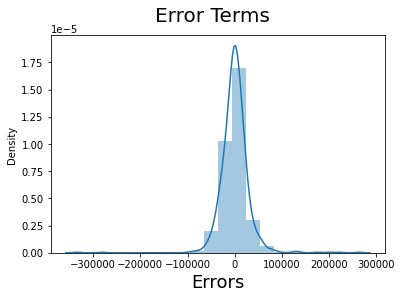

In [226]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Evaluate R2 of Train model

In [227]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.85

In [228]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

986871493537.8628
966573451.0654875
31089.76440993864


In [229]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

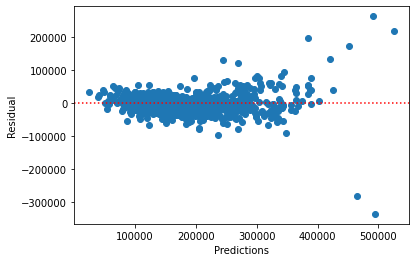

In [230]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

Prediction and Evalution on Test Data

In [231]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal    MoSold  SalePrice  HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1436    -0.433386 -0.144614    -1.496155     0.384025     -0.679020   -0.558025  -0.699764 -0.533302     -0.653302      0.665348    0.361022   -0.293313  -0.703973    -0.431488  -1.181447 -0.765928 -0.789230     -0.124502  -1.230557     -0.837450     -0.247791 -1.028080 -0.753316      0.175669     -0.234155    -0.776063     -0.937484   -0.927153     0.232304    0.306009    0.264038   -0.744598    -0.710899      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263 -0.469175     120500 -0.016404              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              1              0                 0                     0                    0                     0                     0                     0   
57       0.880036  0.112107     0.648310    -0.532073      0.923321   -0.558025   1.051361  0.577925     -0.653302     -1.226909   -0.964030   -0.293313   0.660517    -0.440205   0.871757 -0.775986  1.186484     -0.124502   0.379709     -0.837450     -0.247791  0.784821  1.244440      0.175669     -0.234155     0.741868      0.308833   -0.927153     0.298247    0.306009    0.438477   -0.744598     0.347093      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263  0.622834     196500 -1.137362              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             0                  0              0              0                 0                     0                    0                     0                     0                     1   
780     -0.297515 -0.253806     0.648310    -0.532073      0.534875   -0.355087  -0.699764  0.577925     -0.653302     -1.226909   -0.964030   -0.293313   1.501060     0.381373  -0.154845  0.212191 -0.789230     -0.124502  -0.498789     -0.837450     -0.247791  0.784821 -0.753316      0.175669     -0.234155    -0.776063     -0.314326    0.622148     0.278464    0.306009   -0.329996    1.023633    -0.393502      -0.368121  -0.121922    -0.275126  -0.062302 -0.084263 -0.105172     176000 -0.807668              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0             0             0             1                  0              0              0                 1                     0                    0                     0                     0                     0   
382      0.427132 -0.120835     0.648310    -0.532073 

In [232]:
df_test.describe()

LotFrontage     LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea   ExterQual    BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF   HeatingQC    1stFlrSF    2ndFlrSF  LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch    PoolArea     MiscVal      MoSold      SalePrice    HouseAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
count   439.000000  439.000000   439.000000   439.000000    439.000000  439.000000  439.000000  439.000000    439.000000    439.000000  439.000000  439.000000  439.000000   439.000000  439.000000  439.000000  439.000000    439.000000  439.000000    439.000000    439.000000  439.000000  439.000000    439.000000    439.000000   439.000000    439.000000  439.000000   439.000000  439.000000  439.000000  439.000000   439.000000     439.000000  439.000000   439.000000  439.000000  439.000000  439.000000     439.000000  439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000     439.000000      439.000000      439.000000      439.000000      439.000000   439.000000   439.000000   439.000000   439.000000    439.000000    439.000000    439.000000         439.000000     439.000000     439.000000        439.000000            439.000000           439.000000            439.000000            439.000000   
mean      0.044381    0.008671     0.014903    -0.016637     -0.019148   -0.024379   -0.021652    0.033702     -0.110963     -0.074960   -0.032377   -0.068902    0.025916    -0.033111   -0.019212   -0.050044    0.026373     -0.010664   -0.016811     -0.091341     -0.030499   -0.012195    0.038505      0.042261     -0.105435     0.001920      0.027773    0.075129     0.003095   -0.020822    0.015445    0.042849    -0.018849      -0.067836   -0.054609     0.066047    0.058699   -0.030043    0.039931  181645.895216    0.005526       0.061503       0.002278       0.002278       0.093394       0.223235       0.041002       0.013667       0.034169       0.011390       0.022779        0.047836        0.038724        0.009112        0.011390     0.045558     0.006834     0.794989     0.145786      0.022779      0.002278      0.633257           0.063781       0.036446       0.002278          0.744875              0.002278             0.009112              0.043280              0.018223   
std       0.991429    0.891711     0.961406     1.063263      1.008023    0.878475    1.018493    0.909956      0.933225      0.988361    0.935148    0.798998    0.949447     0.844311    0.949066    0.902588    1.009237      1.029982    0.961083      0.956973      0.966692    0.995798    1.014870      0.983782      0.846603     1.024904      1.042020    0.993950     0.990890    1.006806    1.026307    1.023814     1.004550       0.887293    0.638820     1.280055    1.477231    0.348993    0.945506   80320.777267    0.991060       0.240526       0.047727       0.047727       0.291316       0.416889       0.198522       0.116239       0.181869       0.106233       0.149369        0.213663        0.193157        0.095127        0.106233     0.208763     0.082477     0.404171     0.353294      0.149369      0.047727      0.482465           0.244642       0.187612       0.047727          0.436429              0.047727             0.095127              0.203719              0.133910   
min      -2.199712   -0.891

In [233]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [234]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'KitchenQual', 'GarageYrBlt', 'GarageCars', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco',
       'Exte

In [235]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     60.43
Date:                Wed, 28 Dec 2022   Prob (F-statistic):          9.63e-152
Time:                        06:32:17   Log-Likelihood:                -5112.3
No. Observations:                 439   AIC:                         1.032e+04
Df Residuals:                     390   BIC:                         1.052e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.817e+05   4231.068     42.949      0.000    1.73e+05     1.9e+05
OverallQual           1.949e+04   2847.107      6.845      0.000    1.39e+04    2.51e+04
BsmtExposure          5705.3072   1787.639      3.192      0.002    2190.691    9219.923
BsmtUnfSF             -1.07e+04   1805.559     -5.927      0.000   -1.43e+04   -7151.536
TotalBsmtSF           1.742e+04   3498.135      4.981      0.000    1.05e+04    2.43e+04
1stFlrSF              1.854e+04   3210.524      5.775      0.000    1.22e+04    2.49e+04
2ndFlrSF              2.179e+04   1983.926     10.982      0.000    1.79e+04    2.57e+04
LowQualFinSF          5041.3531   2603.203      1.937      0.054     -76.715    1.02e+04
KitchenQual           9116.9063   2094.809      4.352      0.000    4998.375    1.32e+04
GarageYrBlt          -3200.2861   2029.017     -1.577      0.116   -7189.465     788.893
GarageCars            1.175e+04   2535.431      4.635      0.000    6767.942    1.67e+04
MSSubClass_90        -2.302e+04   1.02e+04     -2.258      0.024   -4.31e+04   -2980.317
MSSubClass_120       -2.738e+04   7584.470     -3.610      0.000   -4.23e+04   -1.25e+04
MSSubClass_160       -4.473e+04   1.29e+04     -3.460      0.001   -7.02e+04   -1.93e+04
MSSubClass_180       -2.758e+04   1.82e+04     -1.513      0.131   -6.34e+04    8254.950
MSSubClass_190       -4635.5144    1.4e+04     -0.332      0.740   -3.21e+04    2.28e+04
MSZoning_RH          -2.881e+04   1.83e+04     -1.578      0.115   -6.47e+04    7078.793
MSZoning_RM           4542.0694   7428.271      0.611      0.541   -1.01e+04    1.91e+04
LotShape_IR3          1.227e+04   2.98e+04      0.412      0.681   -4.63e+04    7.09e+04
LotConfig_CulDSac     1.349e+04   5992.976      2.252      0.025    1712.340    2.53e+04
LotConfig_FR2         1704.4061   7935.533      0.215      0.830   -1.39e+04    1.73e+04
LotConfig_FR3        -7.912e+04   3.05e+04     -2.595      0.010   -1.39e+05   -1.92e+04
Neighborhood_Blueste  1.664e+04   3.29e+04      0.506      0.613    -4.8e+04    8.13e+04
Neighborhood_BrDale   3.039e+04   2.06e+04      1.475      0.141   -1.01e+04    7.09e+04
Neighborhood_ClearCr    55.8639   1.12e+04      0.005      0.996   -2.19e+04     2.2e+04
Neighborhood_Crawfor  2.412e+04   7706.525      3.130      0.002    8972.541    3.93e+04
Neighborhood_Edwards   816.5408   6980.628      0.117      0.907   -1.29e+04    1.45e+04
Neighborhood_Gilbert  -825.2672   6731.603     -0.123      0.902   -1.41e+04    1.24e+04
Neighborhood_MeadowV  1211.6507   1.81e+04      0.067      0.947   -3.43e+04    3.67e+04
Neighborhood_NPkVill  1.866e+04   3.07e+04      0.607      0.544   -4.17e+04     7.9e+04
Neighborhood_NoRidge  2.326e+04   1.36e+04      1.713      0.087   -3430.374       5e+04
Neighborhood_NridgHt  7.267e+04   8497.650      8.552    

In [236]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Calculate r2 score of Test mode

In [237]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.84

In [238]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

442180870646.12885
1007245719.011683
31737.13470072059


In [239]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [240]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4               1stFlrSF  4.35
3            TotalBsmtSF  4.15
41   Exterior2nd_Brk Cmn  3.81
0            OverallQual  3.53
39   Exterior1st_Plywood  2.94
9             GarageCars  2.88
47   Exterior2nd_Plywood  2.83
27  Neighborhood_MeadowV  2.60
37   Exterior1st_BrkComm  2.57
12        MSSubClass_160  2.44
16           MSZoning_RM  2.42
28  Neighborhood_NPkVill  2.28
7            KitchenQual  2.21
51     GarageType_Detchd  2.14
8            GarageYrBlt  2.06
13        MSSubClass_180  2.03
49   Exterior2nd_VinylSd  1.92
31  Neighborhood_OldTown  1.91
5               2ndFlrSF  1.90
22   Neighborhood_BrDale  1.79
50    MasVnrType_BrkFace  1.64
43   Exterior2nd_CmentBd  1.63
32  Neighborhood_Somerst  1.58
11        MSSubClass_120  1.56
2              BsmtUnfSF  1.51
30  Neighborhood_NridgHt  1.50
1           BsmtExposure  1.49
29  Neighborhood_NoRidge  1.39
44   Exterior2nd_HdBoard  1.36
6           LowQualFinSF  1.35
35     HouseStyle_2.5Fin  1.34
10         MSSubClass_90  1.33
25  Neighborhood_Edwards  1.31
26  Neighborhood_Gilbert  1.31
45   Exterior2nd_ImStucc  1.25
33  Neighborhood_StoneBr  1.23
38   Exterior1st_ImStucc  1.20
14        MSSubClass_190  1.19
18     LotConfig_CulDSac  1.18
34  Neighborhood_Veenker  1.17
48    Exterior2nd_Stucco  1.16
24  Neighborhood_Crawfor  1.15
23  Neighborhood_ClearCr  1.14
19         LotConfig_FR2  1.12
17          LotShape_IR3  1.12
42   Exterior2nd_BrkFace  1.12
15           MSZoning_RH  1.09
40     Exterior1st_Stone  1.08
21  Neighborhood_Blueste  1.07
36     RoofStyle_Gambrel  1.06
20         LotConfig_FR3  1.04
46     Exterior2nd_Other   NaN

Text(0, 0.5, 'y_pred')

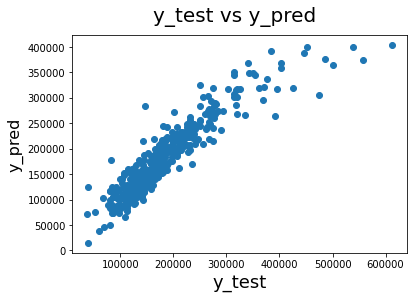

In [241]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [242]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'KitchenQual', 'GarageYrBlt', 'GarageCars', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco',
       'Exte

In [243]:
#final dataframe 
final_df = data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

OverallQual  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  MSSubClass_90  MSSubClass_160  MSZoning_RL  LotShape_IR3  LotConfig_CulDSac  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Veenker  Exterior1st_ImStucc  Exterior1st_Stucco  Exterior2nd_CmentBd  Exterior2nd_ImStucc  Exterior2nd_VinylSd
0            7        150          856       856       854              0               0            1             0                  0                     0                     0                     0                     0                     0                     0                    0                   0                    0                    0                    1
1            6        284         1262      1262         0              0               0            1             0                  0                     0                     0                     0                     0                     0                     1                    0                   0                    0                    0                    0
2            7        434          920       920       866              0               0            1             0                  0                     0                     0                     0                     0                     0                     0                    0                   0                    0                    0                    1
3            7        540          756       961       756              0               0            1             0                  0                     1                     0                     0                     0                     0                     0                    0                   0                    0                    0                    0
4            8        490         1145      1145      1053              0               0            1             0                  0                     0                     1                     0                     0                     0                     0                    0                   0                    0                    0                    1

In [244]:
final_df.describe()


OverallQual    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  MSSubClass_90  MSSubClass_160  MSZoning_RL  LotShape_IR3  LotConfig_CulDSac  Neighborhood_Crawfor  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Veenker  Exterior1st_ImStucc  Exterior1st_Stucco  Exterior2nd_CmentBd  Exterior2nd_ImStucc  Exterior2nd_VinylSd
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000     1460.000000  1460.000000   1460.000000        1460.000000           1460.000000           1460.000000            1460.00000           1460.000000           1460.000000           1460.000000          1460.000000         1460.000000          1460.000000          1460.000000          1460.000000
mean      6.099315   567.240411  1057.429452  1162.626712   346.992466       0.035616        0.043151     0.788356      0.006849           0.064384              0.034932              0.028082               0.05274              0.058904              0.017123              0.007534             0.000685            0.017123             0.041096             0.006849             0.345205
std       1.382997   441.866955   438.705324   386.587738   436.528436       0.185395        0.203266     0.408614      0.082505           0.245519              0.183669              0.165264               0.22359              0.235526              0.129775              0.086502             0.026171            0.129775             0.198580             0.082505             0.475598
min       1.000000     0.000000     0.000000   334.000000     0.000000       0.000000        0.000000     0.000000      0.000000           0.000000              0.000000              0.000000               0.00000              0.000000              0.000000              0.000000             0.000000            0.000000             0.000000             0.000000             0.000000
25%       5.000000   223.000000   795.750000   882.000000     0.000000       0.000000        0.000000     1.000000      0.000000           0.000000              0.000000              0.000000               0.00000              0.000000              0.000000              0.000000             0.000000            0.000000             0.000000             0.000000             0.000000
50%       6.000000   477.500000   991.500000  1087.000000     0.000000       0.000000        0.000000     1.000000      0.000000           0.000000              0.000000              0.000000               0.00000              0.000000              0.000000              0.000000             0.000000            0.000000             0.000000             0.000000             0.000000
75%       7.000000   808.000000  1298.250000  1391.250000   728.000000       0.000000        0.000000     1.000000      0.000000           0.000000              0.000000              0.000000               0.00000              0.000000              0.000000              0.000000             0.000000            0.000000             0.000000             0.000000             1.000000
max      10.000000  2336.000000  6110.000000  4692.000000  2065.000000       1.000000        1.000000     1.000000      1.000000           1.000000              1.000000              1.000000               1.00000              1.000000              1.000000              1.000000             1.000000            1.000000             1.000000             1.000000             1.000000

In [245]:
final_df.shape

(1460, 21)

## Final evalution
No of Variables = 21

## VIF < 5
## p-value < 0.05
## r2 score for Train Data set model = 0.80
## r2 score for Test Data set model = 0.82

In [246]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)


0.8453629452433862


In [247]:
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


0.8435159653864239


In [248]:
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)


986871493537.8628


In [249]:
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)


442180870646.12885


In [250]:
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)


966573451.0654875


In [251]:
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

1007245719.011683


# **Ridge Regression**

In [252]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [253]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [269]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 20087.67279499   8378.41623909  -6082.97911186   8071.07282399
  20169.27359199  19195.98048026   -664.78773664   9449.95303605
  -4129.36182965  10991.16911265 -18222.08488915 -14086.73142425
 -21774.02400817  -7157.04529767 -11035.86811668  -1042.04377506
  -8126.75303843 -17312.93542171  10778.82513085  -6798.41750073
  -4249.6296291    1854.28535915   4277.79226271   9670.11484579
  22024.08992171 -12007.62218455   2401.12071147  -2964.21234625
   4362.57768076  45130.18544408  39656.25779467  -8192.60623685
  18337.67155409  17908.02785311  14957.66251506    862.2116625
   2474.59777745  -2822.40020601  -4973.63474535  -4527.66366715
  -3963.1414171     382.47494402  12213.10408367  10521.73220022
   -146.68661759   9909.35093466      0.           1576.26644368
 -17203.94046403   7187.8512625     161.09937117  -1829.44696105]


In [270]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8405921899078522
0.8388988221736701
1017317769501.2295
455227648298.27026
996393505.8777958
1036965030.2921873


## **Lasso Regression**

In [256]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [257]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [258]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [259]:
lasso.coef_

array([ 19855.74303059,   8399.42626102,  -5865.25659018,   7705.15216362,
        20191.7805807 ,  18957.46880586,   -560.48478715,   9195.04990756,
        -3641.82839837,  10381.01004311, -18867.60224732, -14901.32426756,
       -22929.85775022,     -0.        , -10358.41228666,     -0.        ,
        -7384.08418221, -17556.15773194,  10386.66343042,  -4933.08698995,
           -0.        ,      0.        ,      0.        ,   8750.76860928,
        24914.40200938, -11361.37016362,   2226.29289825,     -0.        ,
            0.        ,  54426.84180168,  45697.75689234,  -7723.95547381,
        21105.28675406,  23202.75532588,  15601.67244741,      0.        ,
            0.        ,     -0.        ,     -0.        ,   -313.48773069,
           -0.        ,      0.        ,  11944.08616165,   8166.95488097,
            0.        ,   3718.9477599 ,      0.        ,      0.        ,
       -18253.61054404,   7036.4825831 ,      0.        ,  -1435.69663583])

In [260]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8410242459731152
0.8396416391691323
1014560449691.3735
453128651639.6316
993692898.8162327
1032183716.7189785


In [261]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.453629e-01      8.385544e-01      8.410242e-01
1   R2 Score (Test)       8.435160e-01      8.373092e-01      8.396416e-01
2       RSS (Train)       9.868715e+11      1.030323e+12      1.014560e+12
3        RSS (Test)       4.421809e+11      4.597195e+11      4.531287e+11
4       MSE (Train)       3.108976e+04      3.176683e+04      3.152289e+04
5        MSE (Test)       3.173713e+04      3.236043e+04      3.212762e+04

## Lets observe the changes in the coefficients after regularization

In [262]:
betas = pd.DataFrame(index=X.columns)

In [263]:
betas.rows = X.columns

In [264]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [265]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear         Ridge         Lasso
OverallQual           1.837670e+04  20510.138051  19855.743031
BsmtExposure          8.550675e+03   8318.737860   8399.426261
BsmtUnfSF            -6.543611e+03  -5981.857219  -5865.256590
TotalBsmtSF           7.192155e+03   8283.586122   7705.152164
1stFlrSF              2.092762e+04  19963.108136  20191.780581
2ndFlrSF              1.887112e+04  19195.846169  18957.468806
LowQualFinSF         -6.639695e+02   -649.110574   -560.484787
KitchenQual           8.809045e+03   9665.342630   9195.049908
GarageYrBlt          -4.197208e+03  -4092.934606  -3641.828398
GarageCars            1.045088e+04  11156.365906  10381.010043
MSSubClass_90        -2.347946e+04 -16753.892630 -18867.602247
MSSubClass_120       -2.128771e+04 -12664.917225 -14901.324268
MSSubClass_160       -3.705063e+04 -19303.001428 -22929.857750
MSSubClass_180       -3.116021e+04  -5263.915038     -0.000000
MSSubClass_190       -1.533078e+04  -9822.683397 -10358.412287
MSZoning_RH           7.783188e+02  -1150.874970     -0.000000
MSZoning_RM          -5.128604e+03  -8640.867611  -7384.084182
LotShape_IR3         -2.923053e+04 -14763.199335 -17556.157732
LotConfig_CulDSac     1.050602e+04  10589.386518  10386.663430
LotConfig_FR2        -9.297132e+03  -6077.814822  -4933.086990
LotConfig_FR3        -1.462594e+04  -3174.524862     -0.000000
Neighborhood_Blueste  3.097782e+04   1105.299005      0.000000
Neighborhood_BrDale   1.649116e+04   2902.878690      0.000000
Neighborhood_ClearCr  1.550698e+04   8392.161024   8750.768609
Neighborhood_Crawfor  3.132893e+04  19773.181064  24914.402009
Neighborhood_Edwards -1.078729e+04 -11820.970934 -11361.370164
Neighborhood_Gilbert  7.333644e+03   1505.949505   2226.292898
Neighborhood_MeadowV  8.050023e+03  -2604.705606     -0.000000
Neighborhood_NPkVill  1.782206e+04   2631.492656      0.000000
Neighborhood_NoRidge  6.093230e+04  41109.811964  54426.841802
Neighborhood_NridgHt  5.423567e+04  36035.321259  45697.756892
Neighborhood_OldTown -8.597118e+03  -8015.616716  -7723.955474
Neighborhood_Somerst  3.070127e+04  15879.980091  21105.286754
Neighborhood_StoneBr  3.937476e+04  14212.276504  23202.755326
Neighborhood_Veenker  2.951674e+04  12300.657645  15601.672447
HouseStyle_2.5Fin     1.799492e+03    764.470534      0.000000
RoofStyle_Gambrel     4.087833e+03   2134.357908      0.000000
Exterior1st_BrkComm  -3.075955e+04  -1991.709514     -0.000000
Exterior1st_ImStucc  -6.621025e+04  -3253.933067     -0.000000
Exterior1st_Plywood  -7.151061e+03  -4429.528805   -313.487731
Exterior1st_Stone    -1.909830e+04  -2919.471478     -0.000000
Exterior2nd_Brk Cmn   1.599764e+04    -83.147103      0.000000
Exterior2nd_BrkFace   2.031483e+04  10400.066645  11944.086162
Exterior2nd_CmentBd   1.349008e+04   9419.433543   8166.954881
Exterior2nd_HdBoard   8.384053e+02   -340.124740      0.000000
Exterior2nd_ImStucc   2.806879e+04   8078.502122   3718.947760
Exterior2nd_Other    -8.007754e-12      0.000000      0.000000
Exterior2nd_Plywood   4.681156e+03   1200.355949      0.000000
Exterior2nd_Stucco   -2.289460e+04 -15561.502654 -18253.610544
Exterior2nd_VinylSd   8.835699e+03   6777.728866   7036.482583
MasVnrType_BrkFace    1.634309e+03    -58.674415      0.000000
GarageType_Detchd    -4.112138e+01  -2247.760379  -1435.696636

##The company wants to know:

Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

These are the following variables are significant in predicting the price 

 1) OverallQual

 2) BsmtUnfSF

 3) TotalBsmtSF

 4) 1stFlrSF

 5) 2ndFlrSF

 6) MSSubClass_90

 7) MSSubClass_160

 8) MSZoning_RL

 9) LotShape_IR3

 10) LotConfig_CulDSac

 11) Neighborhood_Crawfor

 12) Neighborhood_NoRidge

 13) Neighborhood_NridgHt

 14) Neighborhood_Somerst

 15) Neighborhood_StoneBr

 16) Neighborhood_Veenker

 17) Exterior1st_ImStucc

 18) Exterior1st_Stucco

 19) Exterior2nd_CmentBd

 20) Exterior2nd_ImStucc
 
 21) Exterior2nd_VinylSd



---



Question 1) 
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [268]:
#earlier for Ridge alpha = 7 now take 14
alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 20917.72246915   8257.36379499  -5871.5775531    8524.88555874
  19724.18431699  19177.95982727   -626.94167243   9903.51381126
  -4035.01886509  11324.42009862 -15156.75086096 -11285.6210375
 -16928.33820106  -3812.8180566   -8565.99237708  -1164.07005204
  -9046.89817337 -12362.03186035  10279.49577017  -5331.39057113
  -2348.15947416    636.29740502   1785.42628631   7160.9269605
  17467.59438486 -11465.44152043    722.59753064  -2134.00503781
   1386.93467268  36852.57793341  32277.81566076  -7784.93713347
  13500.6315092   10988.60893225   9915.3842494     671.47478572
   1809.49067155  -1428.89375261  -2118.71359466  -4340.04211493
  -2136.18599887   -404.28159017   8670.86974492   8275.91552378
   -507.11533959   6504.47177244      0.            845.5992633
 -13798.84288037   6373.56431336   -226.09641776  -2703.04941827]
0.8360702299317254
0.8354972322166847


Coeff values are deceresing as alpha will increase.r2_score of train data is also drop from .839 to 0.835

In [271]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 20894.14190111   8486.61689972  -5434.79670949   7681.80068788
  19823.45863981  18694.76885485   -373.93124386   9892.75619912
  -3255.30796563  10354.7258414  -15070.92567504 -10454.32874328
 -18468.92320952     -0.          -5166.77525314     -0.
  -8536.61401061  -5453.46712632   9861.97143278   -459.38703444
     -0.              0.              0.           2339.52468868
  19662.87786183 -10408.9484043       0.             -0.
      0.          49725.99014758  39465.92727168  -6828.08927362
  15955.91781008   9843.25171623   3910.52397499      0.
      0.             -0.             -0.             -0.
     -0.             -0.           4731.30487114   5208.34497368
     -0.              0.              0.             -0.
 -13336.84714644   5569.94151358     -0.          -2104.90398126]
0.8357985729754709
0.8336247905556695


As alpha value increse But r2score is also dropped by .839  to .833

Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [273]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [274]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [275]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [276]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 100}


In [277]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [278]:
lasso.coef_

array([  6785.06924015,  -4710.473171  ,  11304.66947104,  16369.75626303,
          399.9679125 ,  22534.01324024,  -8163.99868027,  25495.89929071,
       -27411.97594619, -25820.84803473,     -0.        , -14764.00412872,
        -5511.92515347,   3708.07082622,  -4954.99581705, -19042.04084675,
        14858.77061391,  -3290.99741317,      0.        ,      0.        ,
            0.        ,   3353.37709591,  38125.81494086, -16620.38676869,
         9189.0537526 ,  -7798.88955987,      0.        ,  -2495.92575975,
        11963.75298201,  25220.16253168,   7348.08335901,      0.        ,
           -0.        ,     -0.        ,  -7033.13665856,     -0.        ,
           -0.        ,    116.77971534,   5911.44309168,  -1098.24466217,
        14444.20762165,      0.        ,  -4619.11777891,  -8431.64512881,
         8571.08063489,   7597.70051741, -12914.41729577])

In [279]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.706067982043009
0.7210563752962045


value decrese from 0.839 to 0.721

In [280]:
X_train_new.columns

Index(['BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'KitchenQual', 'GarageYrBlt', 'GarageCars', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RH', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', 'Exterior1st_BrkComm', 'Exterior1st_ImStucc', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'GarageType_Detchd'], dtype='object')

These are the new variables

1stFlrSF, 

MSSubClass_90, 

MSSubClass_120, 

TotalBsmtSF,

HouseStyle_1Story
